# **SALARY PREDICTION OF DATA SCIENCE INDUSTRY USING MACHINE LEARNING APPROACH**


Name: Darshkumar Patel<BR>
Student Id: 235841910<BR>
Subject: CP-640

Dataset Link : https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor

# Importing necessary Libraries and Reading the Data

In [1]:
# Import 3rd party libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Now Below I am reading the data set using read_csv
df = pd.read_csv('/content/drive/MyDrive/Uncleaned_DS_jobs.csv')

In [4]:
df.head(10)

index                                 Job Title  \
0      0                         Sr Data Scientist   
1      1                            Data Scientist   
2      2                            Data Scientist   
3      3                            Data Scientist   
4      4                            Data Scientist   
5      5                            Data Scientist   
6      6  Data Scientist / Machine Learning Expert   
7      7                            Data Scientist   
8      8          Staff Data Scientist - Analytics   
9      9                            Data Scientist   

                Salary Estimate  \
0  $137K-$171K (Glassdoor est.)   
1  $137K-$171K (Glassdoor est.)   
2  $137K-$171K (Glassdoor est.)   
3  $137K-$171K (Glassdoor est.)   
4  $137K-$171K (Glassdoor est.)   
5  $137K-$171K (Glassdoor est.)   
6  $137K-$171K (Glassdoor est.)   
7  $137K-$171K (Glassdoor est.)   
8  $137K-$171K (Glassdoor est.)   
9  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   
5  About Us:\n\nHeadquartered in beautiful Santa ...     4.2   
6  Posting Title\nData Scientist / Machine Learni...     3.9   
7  Introduction\n\nHave you always wanted to run ...     3.5   
8  Intuit is seeking a Staff Data Scientist to co...     4.4   
9  Ready to write the best chapter of your career...     3.6   

              Company Name           Location            Headquarters  \
0         Healthfirst\n3.1       New York, NY            New York, NY   
1             ManTech\n4.2      Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8         Boston, MA              Boston, MA   
3             INFICON\n3.5         Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9       New York, NY            New York, NY   
5         HG Insights\n4.2  Santa Barbara, CA       Santa Barbara, CA   
6            Novartis\n3.9      Cambridge, MA      Basel, Switzerland   
7              iRobot\n3.5        Bedford, MA             Bedford, MA   
8       Intuit - Data\n4.4      San Diego, CA       Mountain View, CA   
9  XSELL Technologies\n3.6        Chicago, IL             Chicago, IL   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   
5      51 to 200 employees     2010        Company - Private   
6         10000+ employees     1996         Company - Public   
7   1001 to 5000 employees     1990         Company - Public   
8  5001 to 10000 employees     1983         Company - Public   
9      51 to 200 employees     2014        Company - Private   

                                   Industry                     Sector  \
0                        Insurance Carriers                  Insurance   
1                    Research & Development          Business Services   
2                                Consulting          Business Services   
3     Electrical & Electronic Manufacturing              Manufacturing   
4                   Advertising & Marketing          Business Services   
5              Computer Hardware & Software     Information Technology   
6                 Biotech & Pharmaceuticals  Biotech & Pharmaceuticals   
7  Consumer Electronics & Appliances Stores                     Retail   
8              Computer Hardware & Software     Information Technology   
9   Enterprise Software & Network Solutions     Information Technolo

In [5]:
# Getting some Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [6]:
# Some stats about the data
df.describe()

index      Rating      Founded
count  672.000000  672.000000   672.000000
mean   335.500000    3.518601  1635.529762
std    194.133974    1.410329   756.746640
min      0.000000   -1.000000    -1.000000
25%    167.750000    3.300000  1917.750000
50%    335.500000    3.800000  1995.000000
75%    503.250000    4.300000  2009.000000
max    671.000000    5.000000  2019.000000

In [7]:
# Checking for any null values in the dataset for each feature
df.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

## <b> Data Preprocessing and EDA</b>

In [8]:
# Now Below I am reading the data set using read_csv
df = pd.read_csv('/content/drive/MyDrive/Uncleaned_DS_jobs.csv')

What I am planning to pre process the data is that I will try to clean data as much as possible and try to add more features which are valuable to us.
<hr>
Below are the things I am planning to do
<br>

### I> Salary parsing
### II> company name text only
### III> state field
### IV> age of company
### V> parsing of job description (python, etc..)


## 1) Salary parsing

Here the task is to convert the current salary format from “137K-171K (Glassdoor est.)” in the salary estimate column to “150.0” as an average of the range.

Here:

min_salary: The minimal salary is calculated by transforming the first part of the range (before the dash -) into an integer.


max_salary: The maximum salary is retrieved in a similar manner, using the second part of the range.

avg_salary: The average salary is computed by taking the mean of the minimum and maximum salaries, resulting in a midpoint salary estimate.



<br>
The code takes the salary information provided in ranges (e.g., 137K-171K (Glassdoor est.)") and transforms it into structured, numeric values. First, it removes extraneous text like "(Glassdoor est.)" and symbols such as "$" and "K." It then identifies if the salary is given hourly or as an employer-provided amount, adding separate indicators for each. After cleaning, the code extracts the minimum and maximum salary values from each range and calculates an average, providing a straightforward, numerical representation of salary estimates. This makes salary data ready for analysis in a machine learning model.

In [9]:
df.head(10)

index                                 Job Title  \
0      0                         Sr Data Scientist   
1      1                            Data Scientist   
2      2                            Data Scientist   
3      3                            Data Scientist   
4      4                            Data Scientist   
5      5                            Data Scientist   
6      6  Data Scientist / Machine Learning Expert   
7      7                            Data Scientist   
8      8          Staff Data Scientist - Analytics   
9      9                            Data Scientist   

                Salary Estimate  \
0  $137K-$171K (Glassdoor est.)   
1  $137K-$171K (Glassdoor est.)   
2  $137K-$171K (Glassdoor est.)   
3  $137K-$171K (Glassdoor est.)   
4  $137K-$171K (Glassdoor est.)   
5  $137K-$171K (Glassdoor est.)   
6  $137K-$171K (Glassdoor est.)   
7  $137K-$171K (Glassdoor est.)   
8  $137K-$171K (Glassdoor est.)   
9  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   
5  About Us:\n\nHeadquartered in beautiful Santa ...     4.2   
6  Posting Title\nData Scientist / Machine Learni...     3.9   
7  Introduction\n\nHave you always wanted to run ...     3.5   
8  Intuit is seeking a Staff Data Scientist to co...     4.4   
9  Ready to write the best chapter of your career...     3.6   

              Company Name           Location            Headquarters  \
0         Healthfirst\n3.1       New York, NY            New York, NY   
1             ManTech\n4.2      Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8         Boston, MA              Boston, MA   
3             INFICON\n3.5         Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9       New York, NY            New York, NY   
5         HG Insights\n4.2  Santa Barbara, CA       Santa Barbara, CA   
6            Novartis\n3.9      Cambridge, MA      Basel, Switzerland   
7              iRobot\n3.5        Bedford, MA             Bedford, MA   
8       Intuit - Data\n4.4      San Diego, CA       Mountain View, CA   
9  XSELL Technologies\n3.6        Chicago, IL             Chicago, IL   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   
5      51 to 200 employees     2010        Company - Private   
6         10000+ employees     1996         Company - Public   
7   1001 to 5000 employees     1990         Company - Public   
8  5001 to 10000 employees     1983         Company - Public   
9      51 to 200 employees     2014        Company - Private   

                                   Industry                     Sector  \
0                        Insurance Carriers                  Insurance   
1                    Research & Development          Business Services   
2                                Consulting          Business Services   
3     Electrical & Electronic Manufacturing              Manufacturing   
4                   Advertising & Marketing          Business Services   
5              Computer Hardware & Software     Information Technology   
6                 Biotech & Pharmaceuticals  Biotech & Pharmaceuticals   
7  Consumer Electronics & Appliances Stores                     Retail   
8              Computer Hardware & Software     Information Technology   
9   Enterprise Software & Network Solutions     Information Technolo

In [10]:
# Removing the text part from the salary estimate
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

# Remove the dollar sign and 'K' which represents thousands
minus_kd = salary.apply(lambda x: x.replace('K', '').replace('$', ''))

# Create a column indicating if the salary is provided on an hourly basis
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)

# Create a column indicating if the salary is employer-provided
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

# Remove 'per hour' and 'employer provided salary' from the salary text
min_hr = minus_kd.apply(lambda x: x.lower().replace('per hour', '').replace('employer provided salary:', ''))
# Extract minimum, maximum, and average salary with error handling
def extract_min_salary(x):
    parts = x.split('-')
    if parts[0].strip() != '':  # Ensure the part is not empty
        return int(parts[0].strip())
    else:
        return None  # Return None if there is an issue

def extract_max_salary(x):
    parts = x.split('-')
    if len(parts) > 1 and parts[1].strip() != '':  # Check if the second part exists and is not empty
        return int(parts[1].strip())
    else:
        return None

# Apply the functions to extract min and max salary
df['min_salary'] = min_hr.apply(extract_min_salary)
df['max_salary'] = min_hr.apply(extract_max_salary)

# Calculate the average salary only where min and max salaries are not None
df['avg_salary'] = df[['min_salary', 'max_salary']].mean(axis=1)

In [11]:
print(df.head())

print()
print()
# Printing the columns after removing text and symbols for checking
print(minus_kd.head())


   index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   
3      3     Data Scientist  $137K-$171K (Glassdoor est.)   
4      4     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA

## 2) Company name text only

This is an easy process where we will remove all the unnecessary things from the name of the company

Here the Company Name field by creating a new column, company_txt, which stores a standardized version of each company's name. The logic applied here checks the company's rating: if the rating is less than 0 (indicating a missing or invalid rating), the full company name is retained as is. However, if the rating is valid (0 or higher), the last four characters of the company name are removed. This approach is used because company names on Glassdoor often have an appended rating or location code, and removing these last few characters results in a cleaner, more consistent company name field.

In [12]:
# With the higher Rating of company above 0 the last 4 characters from the company name are removed
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-4], axis=1)


In [13]:
df['company_txt'][246:256]# Randomly checking few company_txt column from the dataset

246                  XPO Logistics
247                     Trace Data
248                       Descript
249    Rincon Research Corporation
250                     MassMutual
251                    Better Hire
252                Parker Hannifin
253                         Gallup
254                    Insider Inc
255          Rapid Value Solutions
Name: company_txt, dtype: object

## 3) State field

We will just find the state in which company has it’s physical existence

This code adds two columns to better understand job location data. The job_state column extracts the state from the Location field if a comma is present, making it easier to analyze jobs by state. The same_state column indicates whether the job location matches the company's headquarters, with 1 if they match and 0 otherwise. This helps identify how often jobs are based at the company's main office, supporting further geographic analysis.

In [14]:
# Extract the state if a comma is present; otherwise, return None
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1].strip() if ',' in x else None)

# returns 1 where the job location is at the headquarters
df['same_state'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)


In [15]:
df['same_state']

0      1
1      0
2      1
3      0
4      1
      ..
667    1
668    0
669    0
670    0
671    0
Name: same_state, Length: 672, dtype: int64

## 4) Age of company

Let's figure out how old is the company bcoz the salaries offered by start-ups and big companies differ a lot so this might be an important factor.

new column, age, where it checks the Founded year for each company. If Founded is less than 1 (indicating the founding year is unknown or not applicable), it keeps the value as is. Otherwise, it calculates the age by subtracting the founding year from 2024, giving the number of years since the company was founded.

In [16]:
# THis will help us to calculate the age of the company from the date it was established
df['age'] = df['Founded'].apply(lambda x: x if x < 1 else 2024 - x)


## 5)Parsing of job description (python, etc.)

In the job description, we would be looking for some common words like:

### 1) python
### 2) r studio
### 3) spark
### 4) aws
### 5) excel

The reason why I have used this words is because they are the most common words we can see on most of the job postings done my companies which are related to Data Science.

Identify Skills in Job Descriptions:

Each line applies a function to the Job Description column, checking if certain keywords are present. If a skill (like "python" or "excel") is mentioned, the function assigns a 1; otherwise, it assigns a 0.

python_yn: Indicates if "python" is mentioned in the job description.

R_yn: Checks for either "r studio" or "r-studio" (both common formats for R Studio).

spark_yn: Checks for "spark."

aws: Looks for mentions of "aws" (Amazon Web Services).

excel: Checks if "excel" is listed.

In [17]:
# Will check the job description
df['Job Description'][1]

"Secure our Nation, Ignite your Future\n\nJoin the top Information Technology and Analytic professionals in the industry to make invaluable contributions to our national security on a daily basis. In this innovative, self-contained, Big Data environment, the ManTech team is responsible for everything from infrastructure, to application development, to data science, to advanced analytics and beyond. The team is diverse, the questions are thought-provoking, and the opportunities for growth and advancement are numerous\n\nThe successful candidate will possess a diverse range of data-focused skills and experience, both technical and analytical. They will have a strong desire and capability for problem solving, data analysis and troubleshooting, analytical thinking, and experimentation.\n\nDuties, Tasks & Responsibilities\nWorking with large, complex, and disparate data sets\nDesigning and implementing innovative ways to analyze and exploit the Sponsors data holdings\nResearching and report

In [18]:
# The below code using lamba fucntion is useful for extracting the important keywords only like python, R studio excel etc from the Job description
# If they are available on the posted job description it will return 1 otherwise 0
df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df['spark_yn'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)


In [19]:
print('Job description having python',df['python_yn'].value_counts())
print()
print('Job description having R language in it',df['R_yn'].value_counts())
print()
print('Job description having spark',df['spark_yn'].value_counts())
print()
print('Job description having aws',df['aws'].value_counts())
print('Job description having excel',df['excel'].value_counts())

# 1 means Yes
# 0 means No

Job description having python python_yn
1    491
0    181
Name: count, dtype: int64

Job description having R language in it R_yn
0    671
1      1
Name: count, dtype: int64

Job description having spark spark_yn
0    483
1    189
Name: count, dtype: int64

Job description having aws aws
0    498
1    174
Name: count, dtype: int64
Job description having excel excel
0    376
1    296
Name: count, dtype: int64


In [20]:
df.head()
# Lets check the dataframe now with applied changes

index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   
3      3     Data Scientist  $137K-$171K (Glassdoor est.)   
4      4     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded  ... avg_salary         company_txt  \
0   1001 to 5000 employees     1993  ...      154.0         Healthfirst   
1  5001 to 10000 employees     1968  ...      154.0             ManTech   
2   1001 to 5000 employees     1981  ...      154.0      Analysis Group   
3    501 to 1000 employees     2000  ...      154.0             INFICON   
4      51 to 200 employees     1998  ...      154.0  Affinity Solutions   

  job_state same_state age  python_yn  R_yn  spark_yn  aws  excel  
0        NY          1  31          0     0         0    1      0  
1        VA          0  56          0     0         0    0      0  
2        MA          1  43          1     0         0    1      1  
3        MA          0  24          1     0         0    1      1  
4        NY          1  26          1     0         0    0      1  

[5 rows x 29 columns]

In [21]:
# Only drop 'index' if it exists in the DataFrame
# and will read df with this removed column

if 'index' in df.columns:
    df_out = df.drop(['index'], axis=1)
else:
    df_out = df

df_out.to_csv('salary_data_cleaned.csv', index=False)
df = pd.read_csv('salary_data_cleaned.csv')


In [22]:
df

Job Title               Salary Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job Description  Rating  \
0    Description\n\nThe Senior Data Scientist is re...     3.1   
1    Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2    Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
667  Summary\n\nWe’re looking for a data scientist ...     3.6   
668  Job Description\nBecome a thought leader withi...    -1.0   
669  Join a thriving company that is changing the w...    -1.0   
670  100 Remote Opportunity As an AINLP Data Scient...     5.0   
671  Description\n\nThe Data Scientist will be part...     2.7   

                  Company Name           Location            Headquarters  \
0             Healthfirst\n3.1       New York, NY            New York, NY   
1                 ManTech\n4.2      Chantilly, VA             Herndon, VA   
2          Analysis Group\n3.8         Boston, MA              Boston, MA   
3                 INFICON\n3.5         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions\n2.9       New York, NY            New York, NY   
..                         ...                ...                     ...   
667              TRANZACT\n3.6       Fort Lee, NJ            Fort Lee, NJ   
668                       JKGT  San Francisco, CA                      -1   
669                 AccessHope      Irwindale, CA                      -1   
670  ChaTeck Incorporated\n5.0  San Francisco, CA         Santa Clara, CA   
671         1-800-Flowers\n2.7       New York, NY         Carle Place, NY   

                        Size  Founded        Type of ownership  ...  \
0     1001 to 5000 employees     1993   Nonprofit Organization  ...   
1    5001 to 10000 employees     1968         Company - Public  ...   
2     1001 to 5000 employees     1981  Private Practice / Firm  ...   
3      501 to 1000 employees     2000         Company - Public  ...   
4        51 to 200 employees     1998        Company - Private  ...   
..                       ...      ...                      ...  ...   
667   1001 to 5000 employees     1989        Company - Private  ...   
668                       -1       -1                       -1  ...   
669                       -1       -1                       -1  ...   
670        1 to 50 employees       -1        Company - Private  ...   
671   1001 to 5000 employees     1976         Company - Public  ...   

    avg_salary           company_txt job_state same_state  age  python_yn  \
0        154.0           Healthfirst        NY          1   31          0   
1        154.0               ManTech        VA          0   56          0   
2        154.0        Analysis Group        MA          1   43          1   
3        154.0               INFICON        MA          0   24          1   
4        154.0    Affinity Solutions        NY          1   26          1   
..         ...                   ...       ...        ...  ...        ...   
667      136.0              TRANZACT        NJ          1   35          1   
668      136.0                  JKGT        CA          0   -1          0   
669      136.0            AccessHope        CA          0   -1          1   

Lets standardizes job titles and seniority levels to simplify analysis. The job_title_general function categorizes various job titles into common roles like "data scientist" or "manager," while the seniority function classifies titles by seniority (e.g., "senior," "junior") based on keywords. By creating the job_simp and seniority columns, the data becomes more consistent, enabling easier analysis of trends in job types and levels within the data science field.

In [23]:
# The below function just returns the the matching keyword according to the roles
def job_title_general(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

# The below seniorty fucntion is useful for returning the the title's level it can be lead, head etc if not than there is a condition for junior too other wise in the end 'na' is returned

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

# Using the above created functions in the dataframe
df['job_simp'] = df['Job Title'].apply(job_title_general)
df['seniority'] = df['Job Title'].apply(seniority)


In [24]:
df.job_simp.value_counts()

job_simp
data scientist      455
na                   69
analyst              55
data engineer        47
machine learning     36
manager               7
director              3
Name: count, dtype: int64

In [25]:
df.seniority.value_counts()

seniority
na        576
senior     94
jr          2
Name: count, dtype: int64

Now what above part has done is that we can check now job seniority level,job with similar role.
<br>
This can give us some information like salary of senior position is higher than junior position.

In [26]:
#This code adds useful details to the dataset by calculating job description length, competitor count, and adjusting salary values.
#The desc_length column records the length of each job description, offering insight into the detail level of job postings.
#The num_comp column counts the number of competitors for each company, helping to gauge competition in the job market.
#Lastly, the code adjusts salaries listed hourly by converting them to approximate annual figures,
#ensuring consistency across salary data for a more accurate comparison. These enhancements help in understanding job market dynamics and competition.

# Job description length
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))

# Competitors count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != -1 else 0)

# Convert hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary * 2 if x['hourly'] == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary * 2 if x['hourly'] == 1 else x.max_salary, axis=1)


In [27]:
df

Job Title               Salary Estimate  \
0    Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1       Data Scientist  $137K-$171K (Glassdoor est.)   
2       Data Scientist  $137K-$171K (Glassdoor est.)   
3       Data Scientist  $137K-$171K (Glassdoor est.)   
4       Data Scientist  $137K-$171K (Glassdoor est.)   
..                 ...                           ...   
667     Data Scientist  $105K-$167K (Glassdoor est.)   
668     Data Scientist  $105K-$167K (Glassdoor est.)   
669     Data Scientist  $105K-$167K (Glassdoor est.)   
670     Data Scientist  $105K-$167K (Glassdoor est.)   
671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job Description  Rating  \
0    Description\n\nThe Senior Data Scientist is re...     3.1   
1    Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2    Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
667  Summary\n\nWe’re looking for a data scientist ...     3.6   
668  Job Description\nBecome a thought leader withi...    -1.0   
669  Join a thriving company that is changing the w...    -1.0   
670  100 Remote Opportunity As an AINLP Data Scient...     5.0   
671  Description\n\nThe Data Scientist will be part...     2.7   

                  Company Name           Location            Headquarters  \
0             Healthfirst\n3.1       New York, NY            New York, NY   
1                 ManTech\n4.2      Chantilly, VA             Herndon, VA   
2          Analysis Group\n3.8         Boston, MA              Boston, MA   
3                 INFICON\n3.5         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions\n2.9       New York, NY            New York, NY   
..                         ...                ...                     ...   
667              TRANZACT\n3.6       Fort Lee, NJ            Fort Lee, NJ   
668                       JKGT  San Francisco, CA                      -1   
669                 AccessHope      Irwindale, CA                      -1   
670  ChaTeck Incorporated\n5.0  San Francisco, CA         Santa Clara, CA   
671         1-800-Flowers\n2.7       New York, NY         Carle Place, NY   

                        Size  Founded        Type of ownership  ... age  \
0     1001 to 5000 employees     1993   Nonprofit Organization  ...  31   
1    5001 to 10000 employees     1968         Company - Public  ...  56   
2     1001 to 5000 employees     1981  Private Practice / Firm  ...  43   
3      501 to 1000 employees     2000         Company - Public  ...  24   
4        51 to 200 employees     1998        Company - Private  ...  26   
..                       ...      ...                      ...  ...  ..   
667   1001 to 5000 employees     1989        Company - Private  ...  35   
668                       -1       -1                       -1  ...  -1   
669                       -1       -1                       -1  ...  -1   
670        1 to 50 employees       -1        Company - Private  ...  -1   
671   1001 to 5000 employees     1976         Company - Public  ...  48   

    python_yn R_yn spark_yn  aws  excel        job_simp  seniority  \
0           0    0        0    1      0  data scientist     senior   
1           0    0        0    0      0  data scientist         na   
2           1    0        0    1      1  data scientist         na   
3           1    0        0    1      1  data scientist         na   
4           1    0        0    0      1  data scientist         na   
..        ...  ...      ...  ...    ...             ...        ...   
667         1    0        0    0      1  data scientist         na   
668         0    0        0    0      0  data scientist         na   
669         1    0        0    0      1  data scientist         na   
670         1    0   

In [28]:
# Describing the data
df.describe()

Rating      Founded  hourly  employer_provided  min_salary  \
count  672.000000   672.000000   672.0              672.0  672.000000   
mean     3.518601  1635.529762     0.0                0.0   99.196429   
std      1.410329   756.746640     0.0                0.0   33.009958   
min     -1.000000    -1.000000     0.0                0.0   31.000000   
25%      3.300000  1917.750000     0.0                0.0   79.000000   
50%      3.800000  1995.000000     0.0                0.0   91.000000   
75%      4.300000  2009.000000     0.0                0.0  122.000000   
max      5.000000  2019.000000     0.0                0.0  212.000000   

       max_salary  avg_salary  same_state         age   python_yn        R_yn  \
count  672.000000  672.000000  672.000000  672.000000  672.000000  672.000000   
mean   148.130952  123.663690    0.400298   32.714286    0.730655    0.001488   
std     48.035110   39.580268    0.490324   40.056688    0.443950    0.038576   
min     56.000000   43.500000    0.000000   -1.000000    0.000000    0.000000   
25%    119.000000  103.000000    0.000000    9.000000    0.000000    0.000000   
50%    133.000000  114.000000    0.000000   20.000000    1.000000    0.000000   
75%    165.000000  136.500000    1.000000   41.000000    1.000000    0.000000   
max    331.000000  271.500000    1.000000  243.000000    1.000000    1.000000   

         spark_yn         aws       excel   desc_length    num_comp  
count  672.000000  672.000000  672.000000    672.000000  672.000000  
mean     0.281250    0.258929    0.440476   3484.638393    1.446429  
std      0.449944    0.438373    0.496814   1625.457082    0.806153  
min      0.000000    0.000000    0.000000     71.000000    1.000000  
25%      0.000000    0.000000    0.000000   2412.750000    1.000000  
50%      0.000000    0.000000    0.000000   3349.000000    1.000000  
75%      1.000000    1.000000    1.000000   4301.000000    1.000000  
max      1.000000    1.000000    1.000000  10524.000000    3.000000

In [29]:
# The columns name
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws', 'excel', 'job_simp', 'seniority', 'desc_length',
       'num_comp'],
      dtype='object')

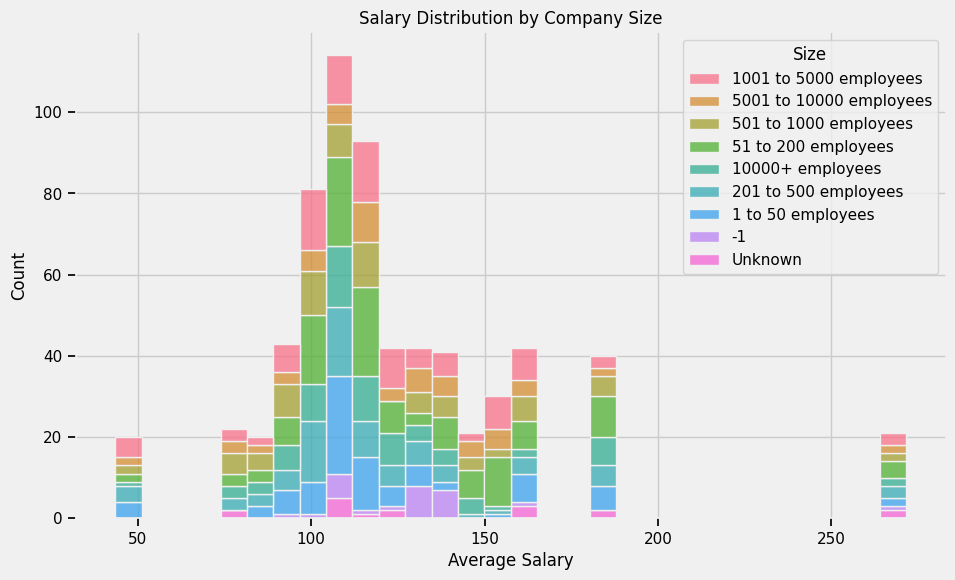

In [30]:
# Plot for Salary Distribution by Company Size

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='avg_salary', hue='Size', multiple="stack", bins=30, kde=False)

plt.title('Salary Distribution by Company Size')
plt.xlabel('Average Salary')
plt.ylabel('Count')

# Show the plot
plt.show()


 The visualization below shows the distribution of company ratings, typically on a scale from 0 to 5. Each bar in the histogram represents the count of companies that fall within specific rating ranges.

From the histogram:

You can observe the concentration of ratings. For example, there may be a high count of companies with ratings between 3 and 5.
A bar on the far left (at -1) indicates missing or invalid ratings coded as -1, allowing you to see how many companies lack a rating.

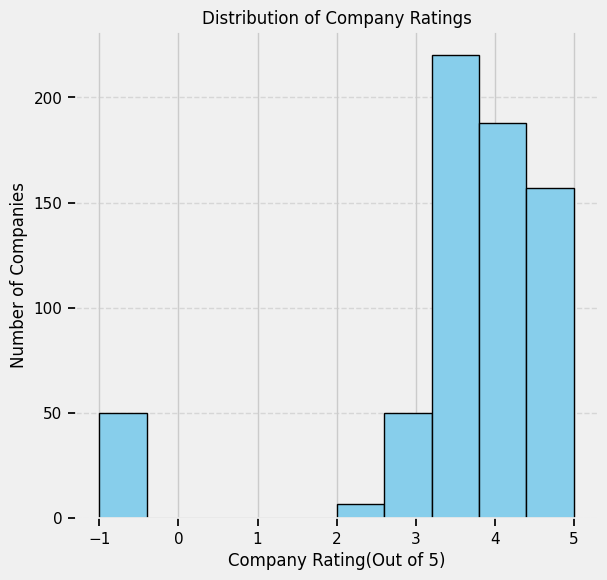

In [31]:
# Plotting the histogram for the Ratings of the company distribution
plt.figure(figsize=(6, 6))
plt.hist(df['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Company Ratings')
plt.xlabel('Company Rating(Out of 5)')
plt.ylabel('Number of Companies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

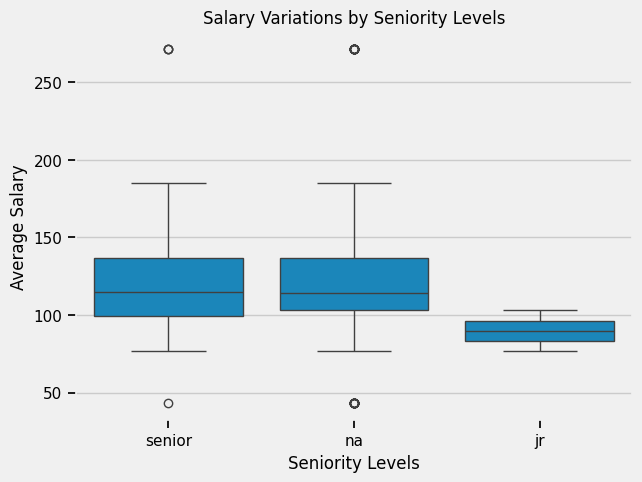

In [32]:
# Box Plots: Salary Variations
# By Job Categories (e.g., Seniority)
sns.boxplot(x='seniority', y='avg_salary', data=df)
plt.title("Salary Variations by Seniority Levels")
plt.xlabel("Seniority Levels")
plt.ylabel("Average Salary")
plt.show()


<Axes: >

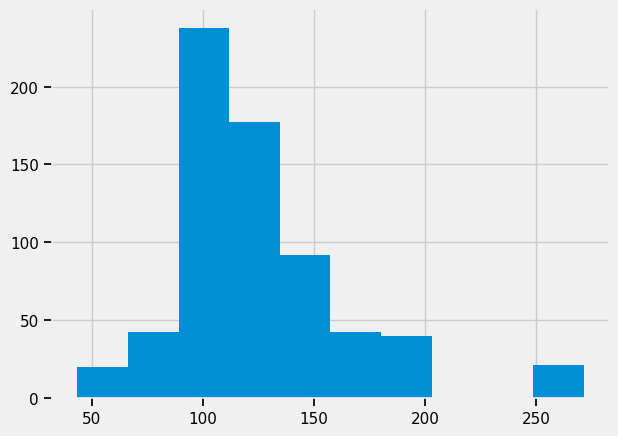

In [33]:
  # Directly using the hist() fucntion to plot the graph
df.avg_salary.hist()
# Y axis is the count
# X axis is the salary range
#You can see the most common salary ranges in the dataset. For instance, if the peak is around 100, it suggests that many job listings offer average salaries close to that range.
# It also shows the spread of salaries, with fewer listings offering very high or very low average salaries.

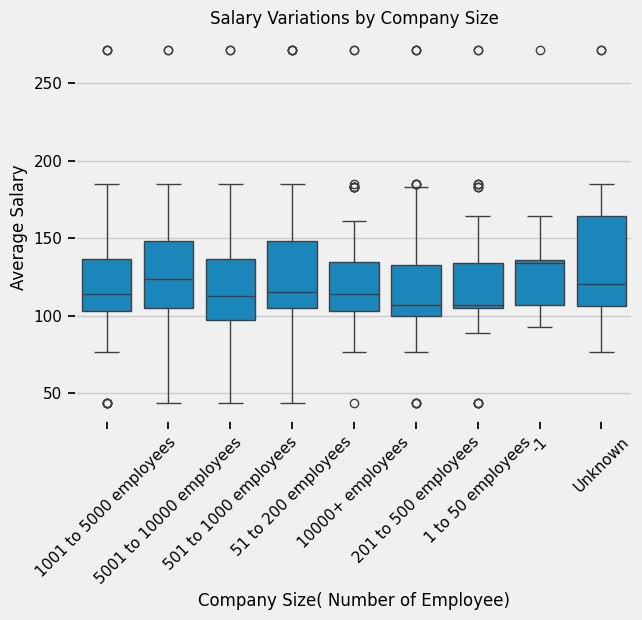

In [34]:
# By Company Size
sns.boxplot(x='Size', y='avg_salary', data=df)
plt.title("Salary Variations by Company Size")
plt.xlabel("Company Size( Number of Employee)")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()


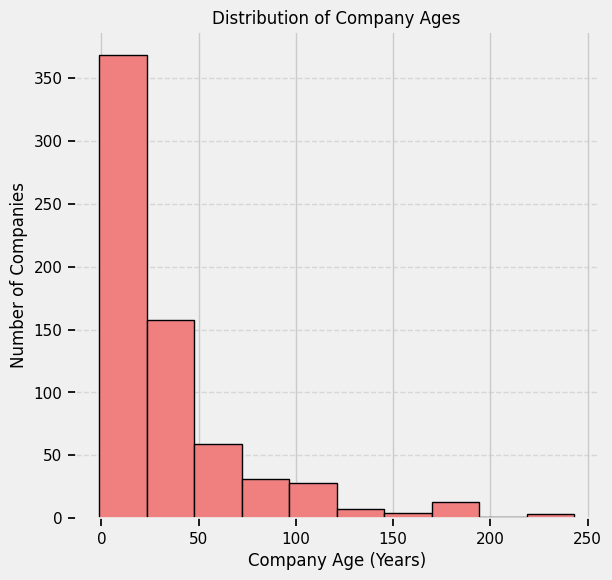

In [35]:
# The below plot gives us the information about the number of companies according to the date it was established(age of the company)
plt.figure(figsize=(6, 6))
plt.hist(df['age'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Company Ages')
plt.xlabel('Company Age (Years)')
plt.ylabel('Number of Companies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: >

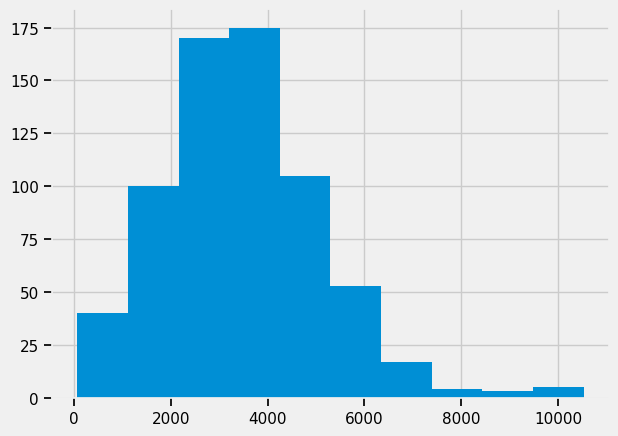

In [36]:
df.desc_length.hist()
# df.desc_length.hist() generates a histogram for the desc_length column, which represents the length of each job description in terms of character count.
# This visualization shows the distribution of job description lengths across all listings.

In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws', 'excel', 'job_simp', 'seniority', 'desc_length',
       'num_comp'],
      dtype='object')

In [38]:
# Now Below I am reading the data set using read_csv using some different variable for plotting few important results plot
df_v = pd.read_csv('/content/drive/MyDrive/Uncleaned_DS_jobs.csv')

In [39]:
# removing thw  white spaces change to lower cases using str()'s function

df_v['Job Title']=df_v['Job Title'].str.strip().str.lower()

#checking the unique values of the title and their counts

title_counts=df_v['Job Title'].value_counts()
print(title_counts)
print()

title_occurance_freq= title_counts.value_counts().sort_index().to_frame()
title_occurance_freq.columns=['count']
print(title_occurance_freq,'\n'*2)

print()
print(title_counts[title_counts>5])

print()
print('Title that have an occurace for more than 5 times',(title_counts[title_counts>5].sum()/df_v.shape[0]*100),"% of raw data")

Job Title
data scientist                                            337
data engineer                                              26
senior data scientist                                      19
machine learning engineer                                  16
data analyst                                               12
                                                         ... 
data science instructor                                     1
business data analyst                                       1
purification scientist                                      1
data engineer, enterprise analytics                         1
ai/ml - machine learning scientist, siri understanding      1
Name: count, Length: 172, dtype: int64

       count
count       
1         96
2         55
3         11
4          3
5          1
6          1
12         1
16         1
19         1
26         1
337        1 



Job Title
data scientist               337
data engineer                 26
senior data scienti

In [40]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


In [41]:
# The reason why I have used fuzzy wuzzy library is because with it's help I can capture words, title in a similar category for getting better insight of data
title_show_up_5 = title_counts[title_counts >= 5].index.to_list()

for i in title_show_up_5:
    print(
        'These are the similar titles to ', i, "\n",
        process.extract(i, df_v['Job Title'].unique(), limit=20, scorer=fuzz.token_sort_ratio),
        "\n" * 2
    )
# The output shows title of job and the similarity scorebetween two titles in the job title feature


These are the similar titles to  data scientist 
 [('data scientist', 100), ('sr data scientist', 90), ('(sr.) data scientist -', 90), ('ai data scientist', 90), ('sr. data scientist', 90), ('data scientist - risk', 85), ('lead data scientist', 85), ('data scientist 3 (718)', 82), ('staff data scientist', 82), ('sr. data scientist ii', 82), ('senior data scientist', 80), ('data scientist (ts/sci)', 80), ('ai ops data scientist', 80), ('data scientist - contract', 76), ('associate data scientist', 74), ('principal data scientist', 74), ('ngs scientist', 74), ('geospatial data scientist', 72), ('experienced data scientist', 70), ('human factors scientist', 70)] 


These are the similar titles to  data engineer 
 [('data engineer', 100), ('jr. data engineer', 90), ('big data engineer', 87), ('data engineer - kafka', 81), ('data engineer (remote)', 79), ('senior data engineer', 79), ('data analyst/engineer', 76), ('software data engineer', 74), ('data analytics engineer', 72), ('cloud data

In [42]:
# Start to integrate the titles that appear less than 5 times now
titles_we_keep = title_show_up_5.copy()
titles_we_keep.append('data science manager')
titles_we_keep


['data scientist',
 'data engineer',
 'senior data scientist',
 'machine learning engineer',
 'data analyst',
 'senior data analyst',
 'senior data engineer',
 'data science manager']

In [43]:
df_v['integrated title'] = pd.Series(np.zeros(len(df_v)), dtype = int)

In [44]:
# Now we use a series of if-else check to consolidate the titles. To do that
# we start by naming some key words to identify certain titles.

senior = ['senior', 'sr', 'experienced', 'ii', 'iii', 'staff']
manager = ['manager', 'management', 'lead', 'principal', 'director','president', 'vp']


for i in range(0, len(df_v)):
    if df_v.loc[i, 'Job Title'] not in titles_we_keep:
        df_v.loc[i, 'integrated title'] = 1
        title = df_v.loc[i, 'Job Title']

        if any(key in title for key in manager):
            df_v.loc[i, 'Job Title'] = 'data science manager'
        elif 'machine learning' in title:
            df_v.loc[i, 'Job Title'] = 'machine learning engineer'

        elif any(key in title for key in senior):
            if 'engineer' in title:
                df_v.loc[i, 'Job Title'] = 'senior data engineer'
            elif 'analyst' in title:
                df_v.loc[i, 'Job Title'] = 'senior data analyst'
            elif 'scientist' in title:
                df_v.loc[i, 'Job Title'] = 'senior data scientist'

        elif 'engineer' in title:
            df_v.loc[i, 'Job Title'] = 'data engineer'
        elif 'analyst' in title:
            df_v.loc[i, 'Job Title'] = 'data analyst'
        elif 'scientist' in title:
            df_v.loc[i, 'Job Title'] = 'data scientist'


In [45]:
df_v['Job Title']=df_v['Job Title'].replace({"it partner digital health technology and data science":"data scientist",'environmental data science':"data scientist"})

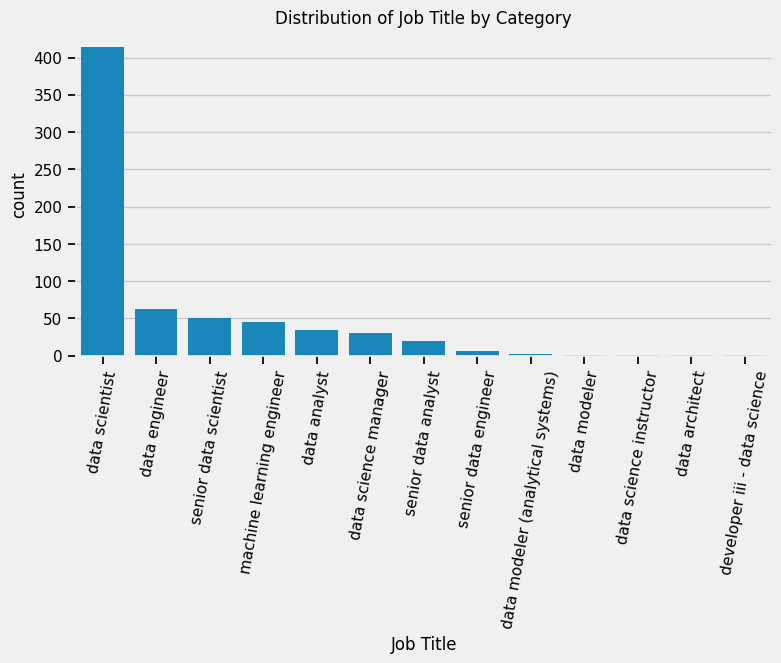

In [46]:
fig,ax=plt.subplots(figsize=(8,4))

sns.countplot(x='Job Title',data=df_v,order=df_v['Job Title'].value_counts().index)
plt.title('Distribution of Job Title by Category')
plt.xticks(rotation=80)

plt.show()
# So after performing the above steps now I have plotted a bar plot showing the information about the job titles where similar type job titles are kept in single category
# For easy understanding

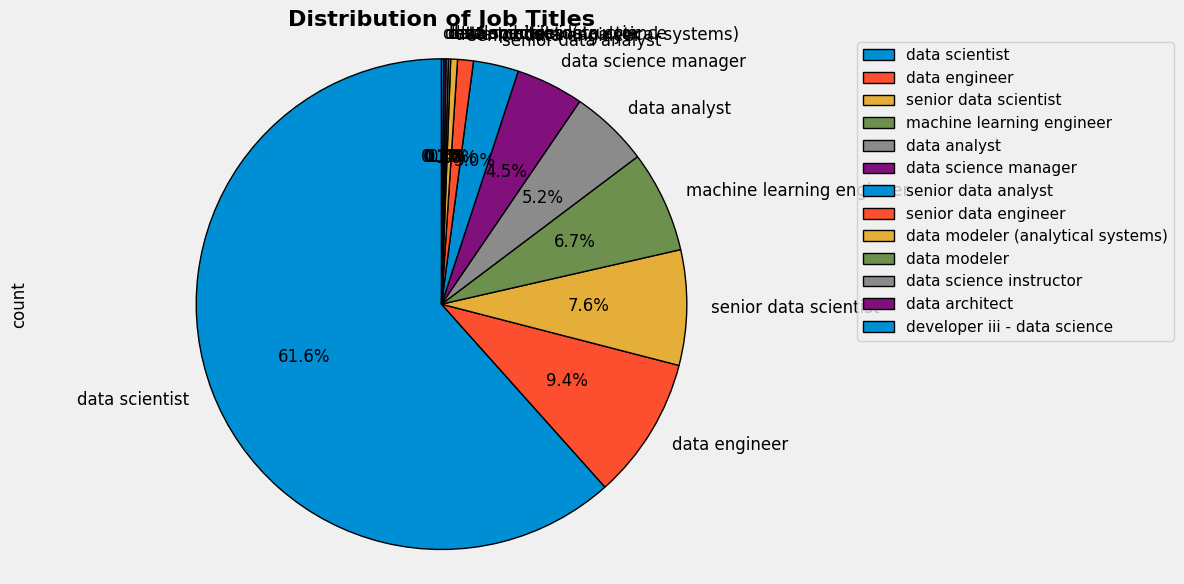

In [47]:
#pie chart visualizes the distribution of job titles
plt.figure(figsize=(12, 6))

df_v['Job Title'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',   # Display percentage with one decimal
    startangle=90,       # Start the pie chart at 90 degrees for better alignment
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'},  # Add border for better separation
    textprops={'fontsize': 12}  # Adjust font size for readability
)

# Add title and make the pie circular
plt.title('Distribution of Job Titles', fontsize=16, fontweight='bold')
plt.axis('equal')  # Ensures pie chart is a perfect circle

# Remove the legend
plt.legend(loc='best', bbox_to_anchor=(1, 1))  # Add legend outside the plot if needed

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [48]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws', 'excel', 'job_simp', 'seniority', 'desc_length',
       'num_comp'],
      dtype='object')

In [49]:
import plotly.express as px
# PLOTLY library for geographical plot

In [50]:
# Choropleth map of job counts by state
# I have done this beacuse most of the job postings are in USA
# Thus it gives a graph showing count of posting per state
state_job_counts = df['job_state'].value_counts().reset_index()
state_job_counts.columns = ['State', 'JobCount']

fig = px.choropleth(state_job_counts,
                    locations='State',
                    locationmode="USA-states",
                    color='JobCount',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Job Distribution Across States")
fig.show()

<Axes: >

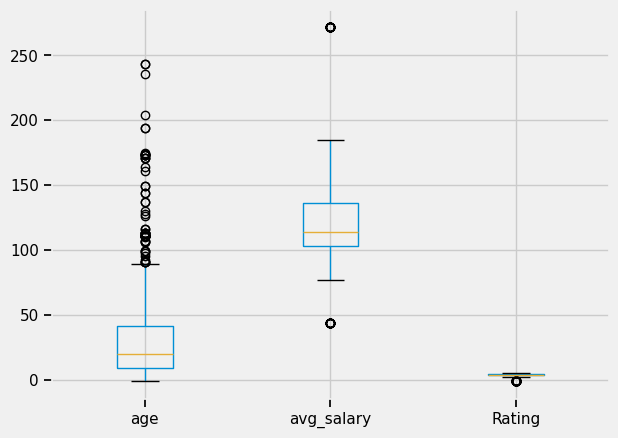

In [51]:
df.boxplot(column = ['age', 'avg_salary','Rating'])
#The box plot helps you compare the spread and detect outliers for each feature,
#  showing that age has a broad distribution with many outliers, avg_salary has a moderate spread with a few high outliers, and Rating is tightly clustered around the median.

<Axes: >

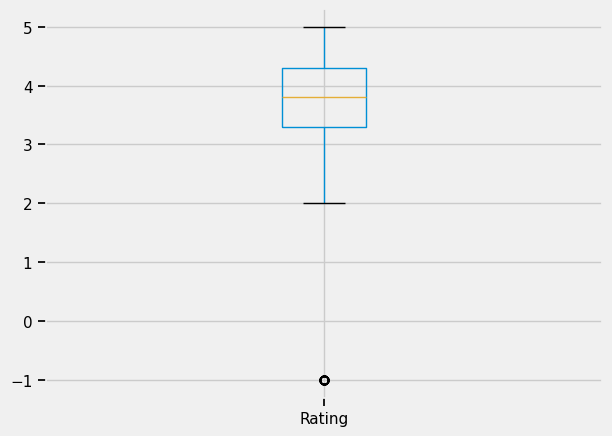

In [52]:
df.boxplot(column = ['Rating'])
# Box plot for the rating column

In [53]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws', 'excel', 'job_simp', 'seniority', 'desc_length',
       'num_comp'],
      dtype='object')

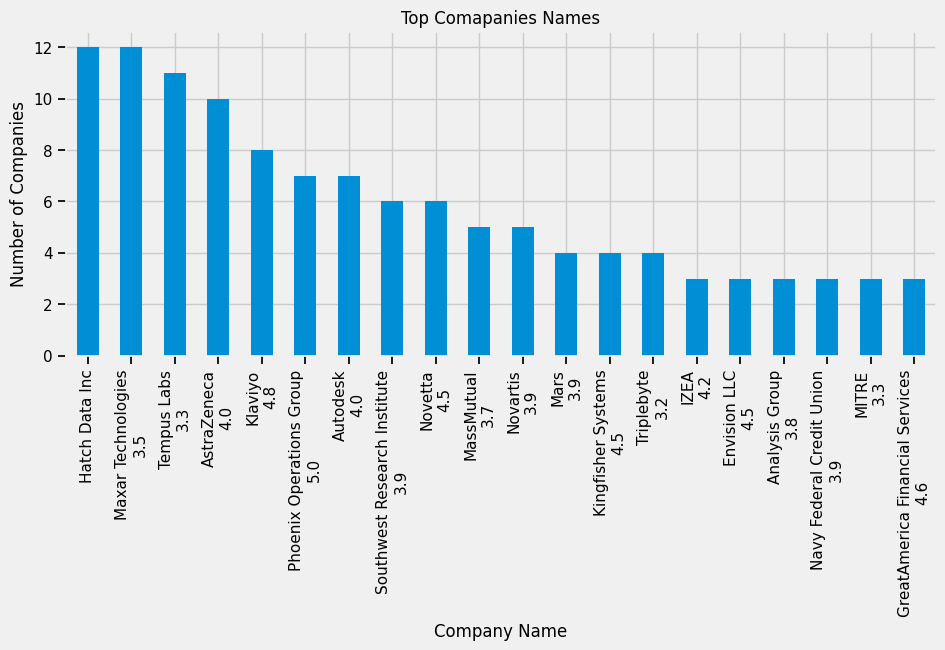

In [54]:
# Below plot gives information about companies with the naximum job posting in the data set
plt.figure(figsize=(10,4))
df['Company Name'].value_counts().head(20).plot(kind='bar')
plt.title("Top Comapanies Names")
plt.xlabel("Company Name")
plt.ylabel("Number of Companies")
plt.show()

In [55]:
# Lets Find the corrleation between some important features
df[['age', 'avg_salary', 'Rating', 'desc_length', 'num_comp']].corr()

age  avg_salary    Rating  desc_length  num_comp
age          1.000000   -0.048532  0.141791     0.252212  0.301725
avg_salary  -0.048532    1.000000 -0.071066     0.002298 -0.000192
Rating       0.141791   -0.071066  1.000000    -0.011147  0.136612
desc_length  0.252212    0.002298 -0.011147     1.000000  0.162370
num_comp     0.301725   -0.000192  0.136612     0.162370  1.000000

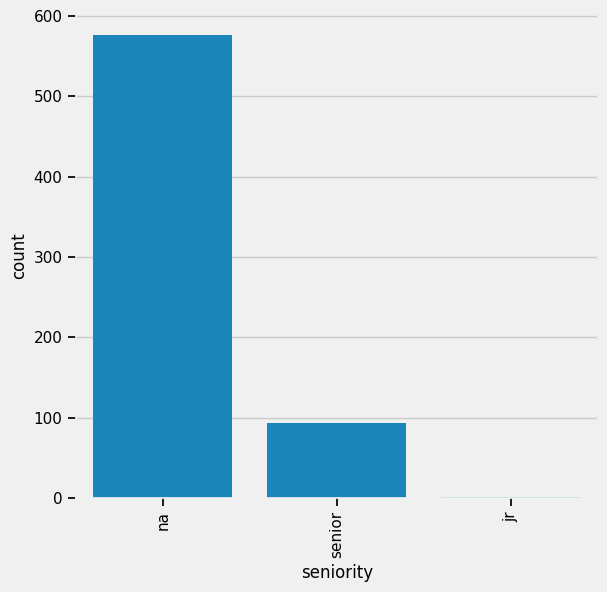

In [56]:
# Number of job seniority position
fig, ax = plt.subplots(figsize=(6,6))
chart = sns.barplot(x=df.seniority.value_counts().index, y=df.seniority.value_counts())
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

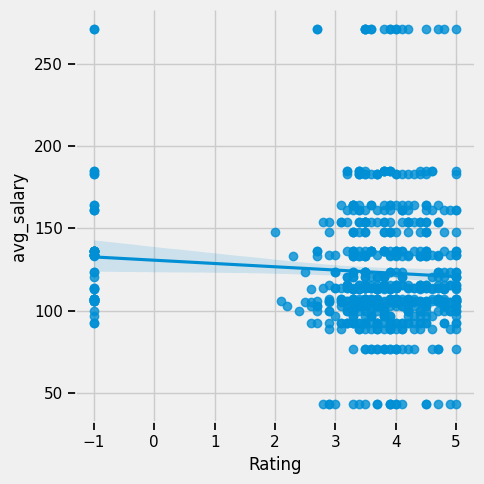

In [57]:
# This plot is quite interesting which gives us a scatter plot with a linear regression line.
# It helps visualize the relationship between two continuous variables and the trend that best fits the data
sns.lmplot(x='Rating',y='avg_salary',data=df)

# This gives information of average salary with the rating's info

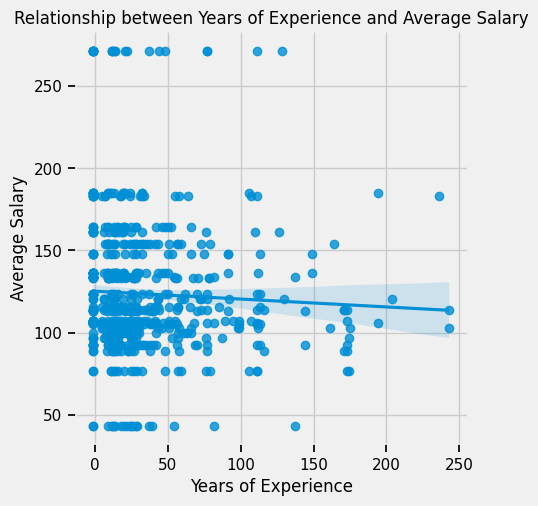

In [58]:

# Similarly  regression plot for age of company vs avg_salary
sns.lmplot(x='age', y='avg_salary', data=df)
plt.title("Relationship between Years of Experience and Average Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Average Salary")
plt.show()


<Axes: >

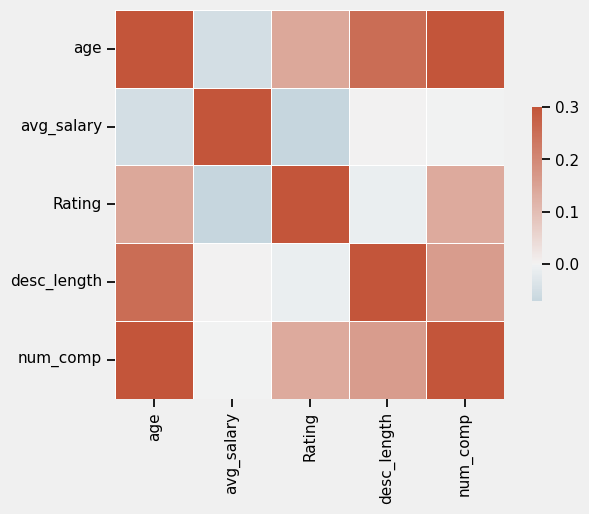

In [59]:
# Lets draw one heat map for it
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_length', 'num_comp']].corr(), vmax=.3, center=0, cmap = cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

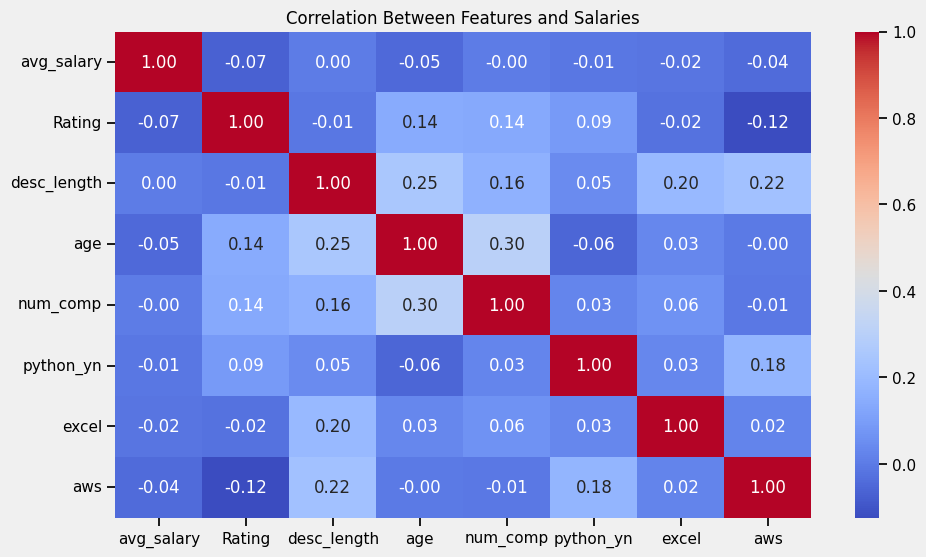

In [60]:
# similarly will compute corr for some other features
correlation_matrix = df[['avg_salary', 'Rating', 'desc_length', 'age', 'num_comp', 'python_yn', 'excel', 'aws']].corr()

# Plotting the heat map
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Features and Salaries")
plt.show()


The numbers represent correlation coefficients between pairs of features. These coefficients, which range from -1 to +1, indicate the strength and direction of the relationship between two variables. A positive value (closer to +1) means that as one variable increases, the other tends to increase as well, showing a direct relationship. A negative value (closer to -1) suggests an inverse relationship, where one variable decreases as the other increases. Values near zero imply little or no linear relationship between the variables.
<br>
<br>
for example: The age and the description lenght have correlatin of 0.25 means the older companies have more job description lenght and vice versa

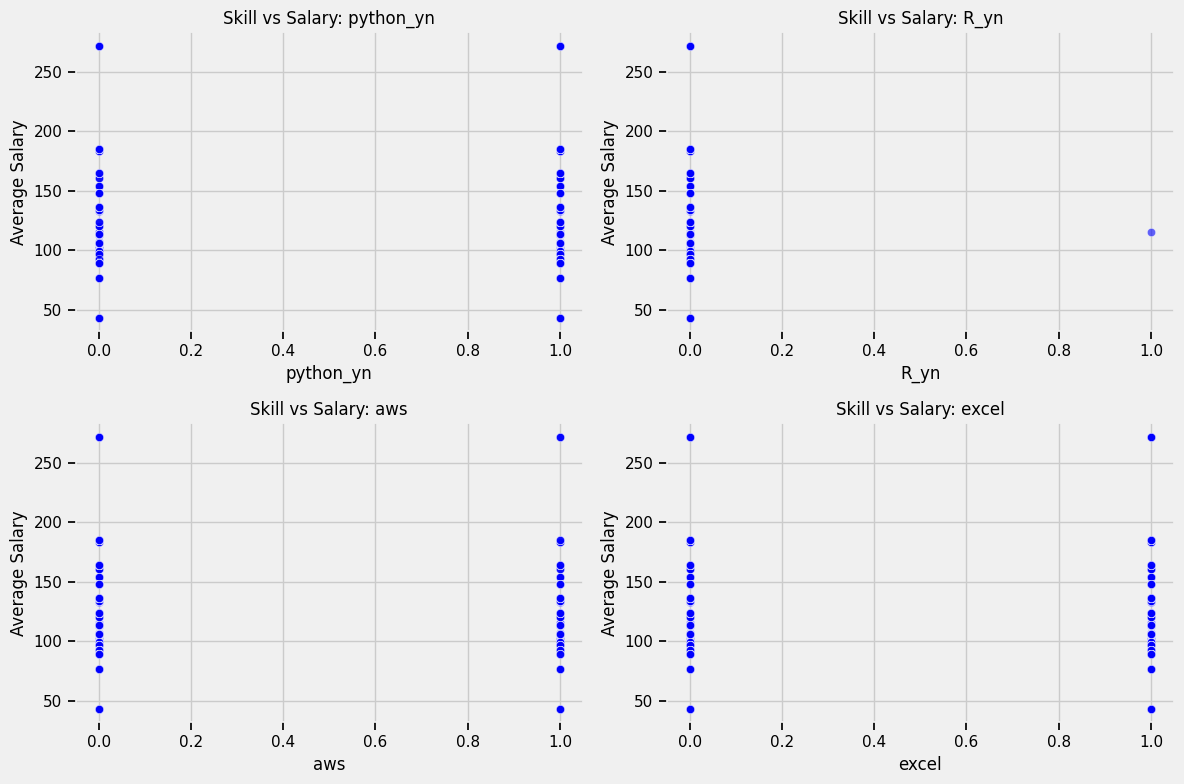

In [61]:
# Scatter plot for skills vs average salary for the features I created(The boolean one)
skills = ['python_yn', 'R_yn', 'aws', 'excel']

# Scatter Plot for skills vs salary
plt.figure(figsize=(12, 8))

for i, skill in enumerate(skills, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=skill, y='avg_salary', color='blue', alpha=0.6)
    plt.title(f'Skill vs Salary: {skill}')
    plt.xlabel(f'{skill}')
    plt.ylabel('Average Salary')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [62]:
# This is finding the co-relation of all the features having categorical values
df_cat =  df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state','python_yn', 'R_yn',
       'spark_yn', 'aws', 'excel', 'job_simp', 'seniority']]

In [63]:
df_cat.columns

Index(['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state',
       'python_yn', 'R_yn', 'spark_yn', 'aws', 'excel', 'job_simp',
       'seniority'],
      dtype='object')

This code analyzes the distribution of values in categorical features, generating bar plots for each feature in the df_cat DataFrame. It iterates through each column, counts the unique values (using value_counts()), and plots them as bar charts. The bar plot for each feature shows the frequency of each category, with the x-axis displaying category names and the y-axis showing their counts. This visual approach helps understand the distribution of categorical data, revealing which categories are more common and aiding in identifying potential imbalances or patterns across features.

Graph for Location: total = 207


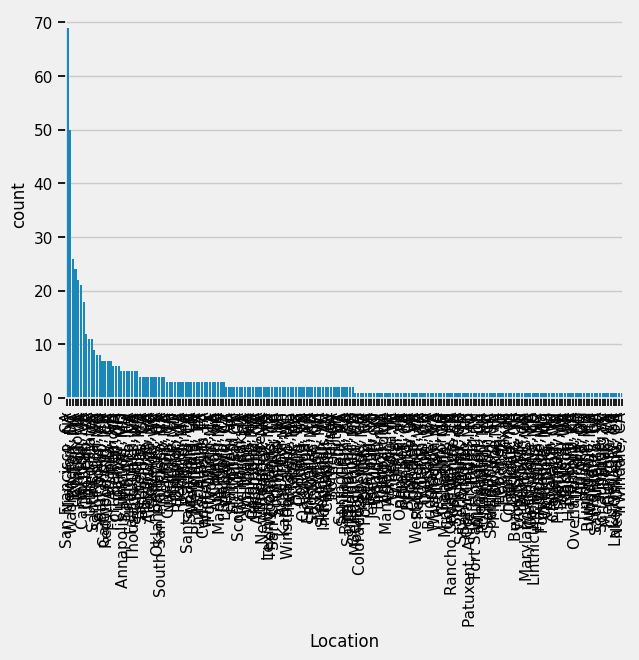

Graph for Headquarters: total = 229


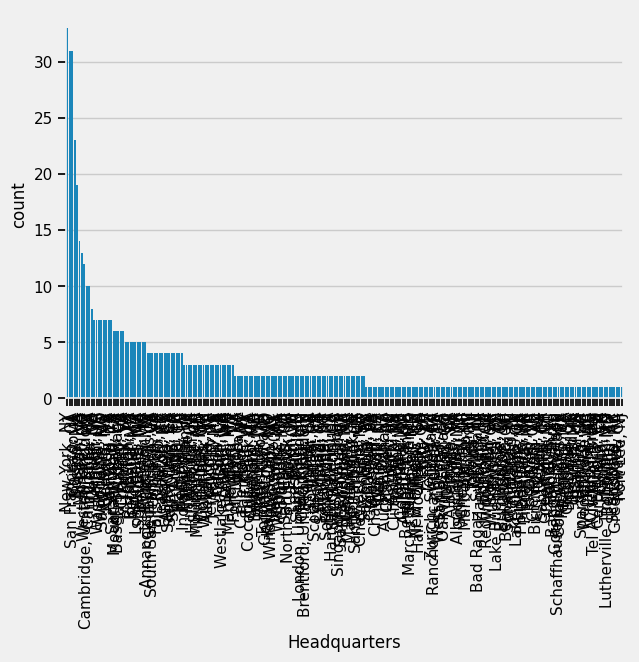

Graph for Size: total = 9


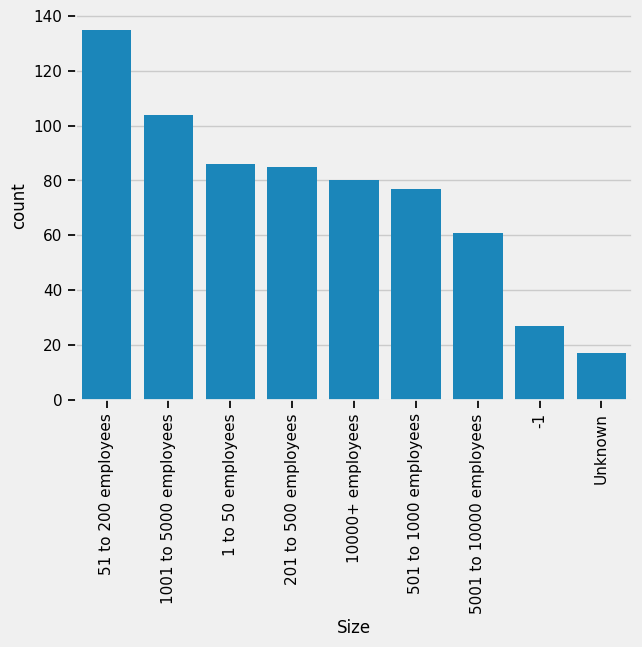

Graph for Type of ownership: total = 13


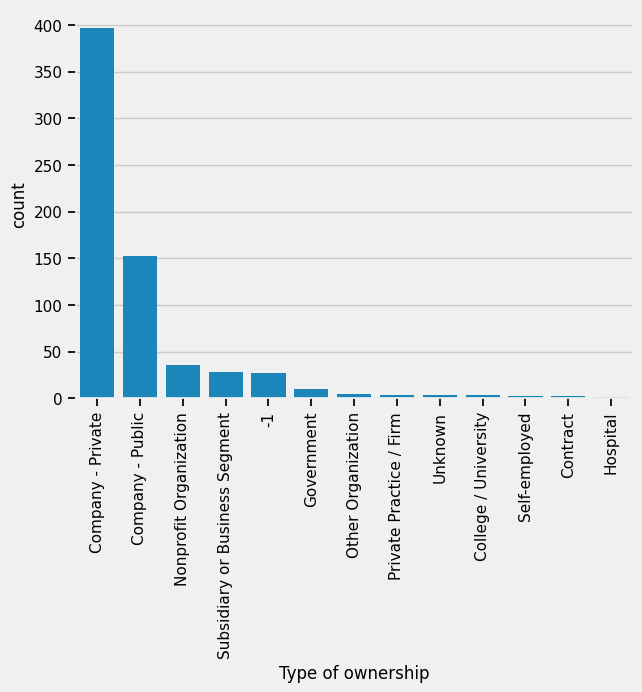

Graph for Industry: total = 58


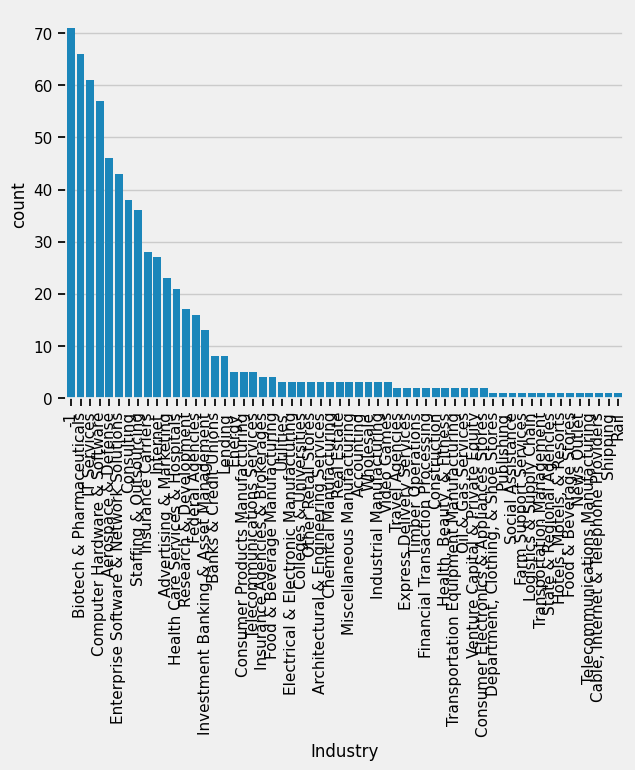

Graph for Sector: total = 23


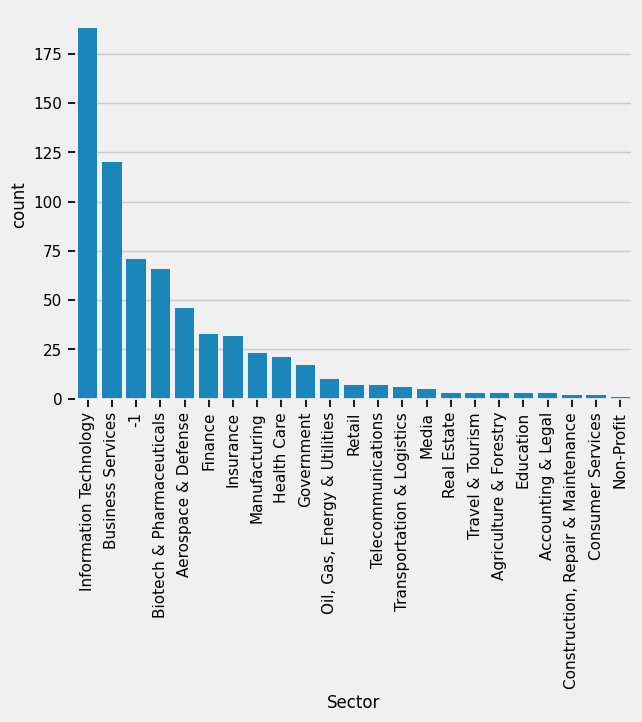

Graph for Revenue: total = 14


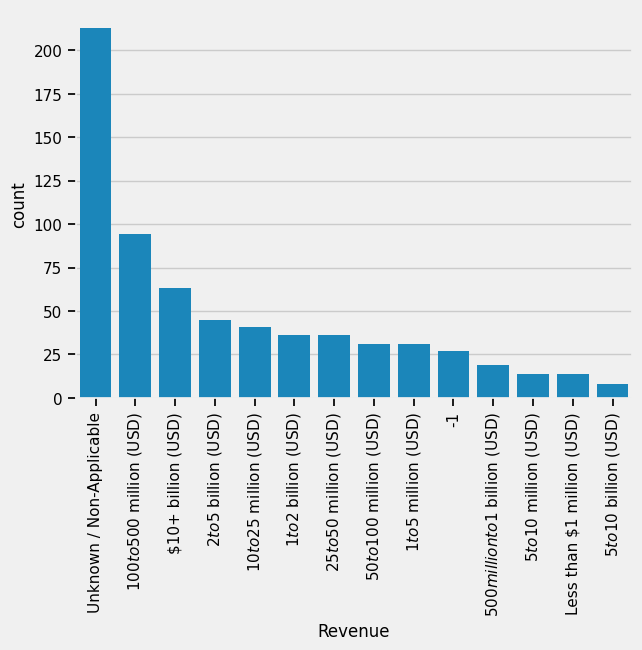

Graph for company_txt: total = 432


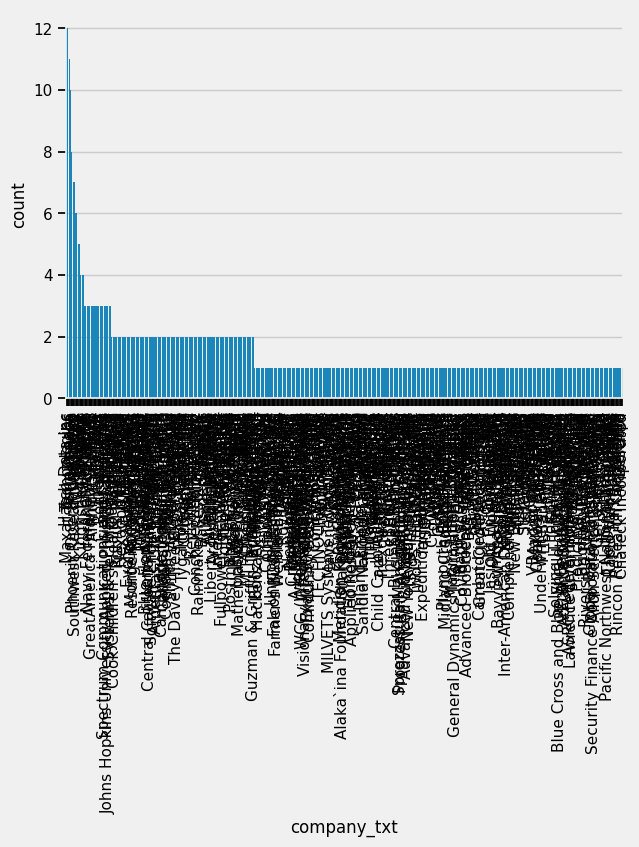

Graph for job_state: total = 39


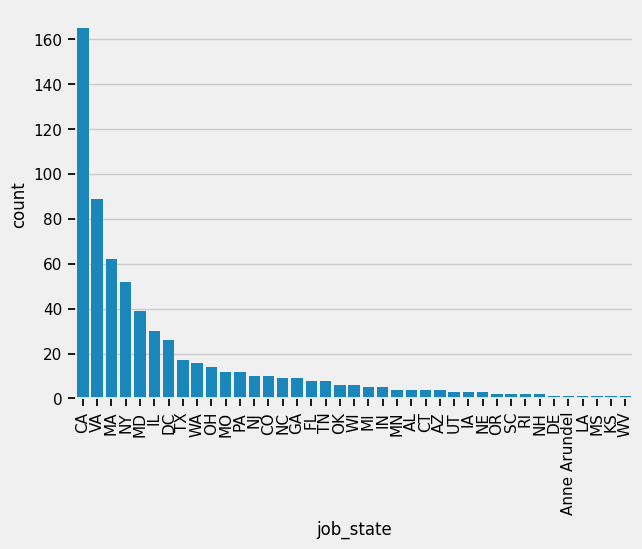

Graph for same_state: total = 2


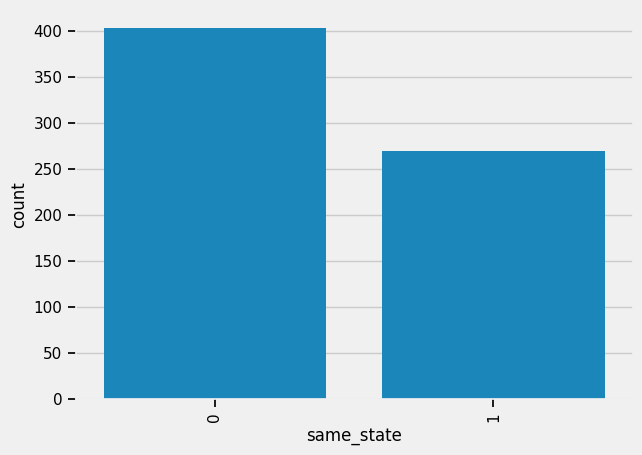

Graph for python_yn: total = 2


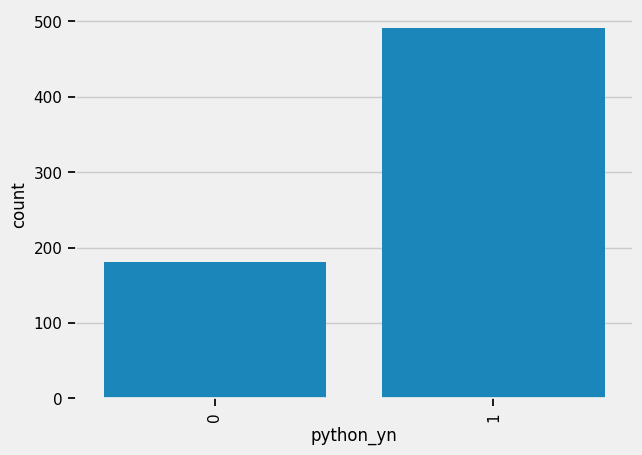

Graph for R_yn: total = 2


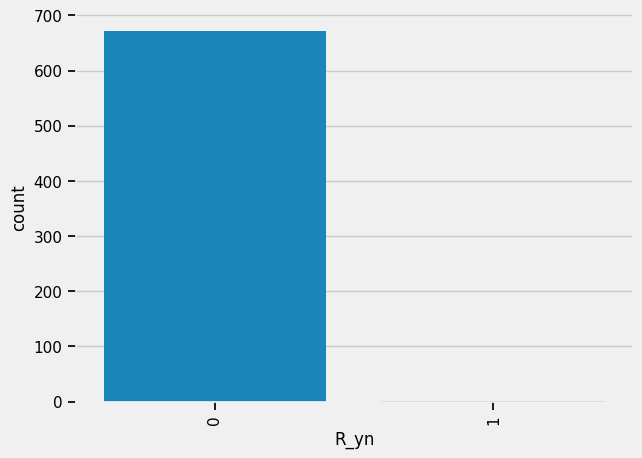

Graph for spark_yn: total = 2


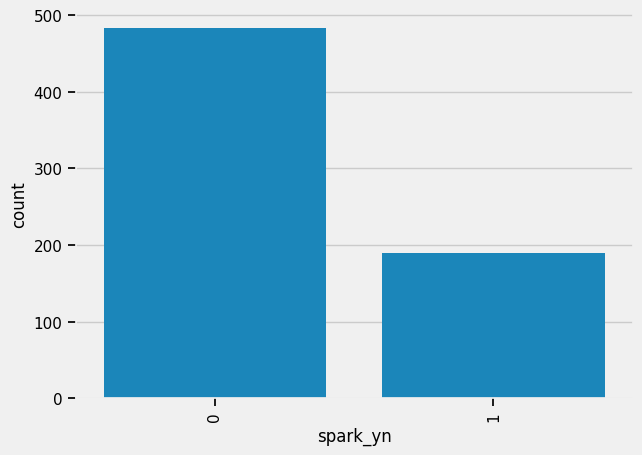

Graph for aws: total = 2


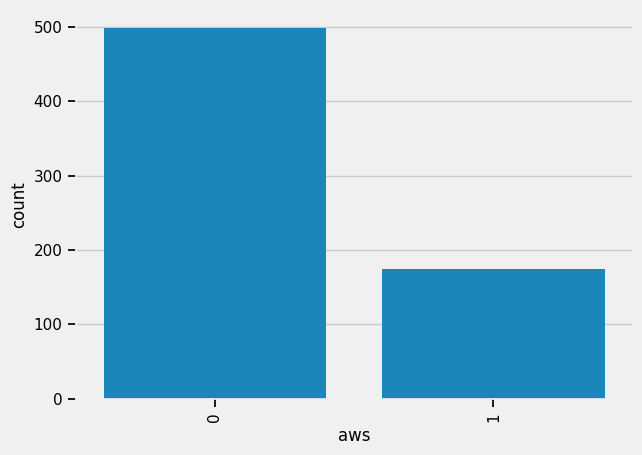

Graph for excel: total = 2


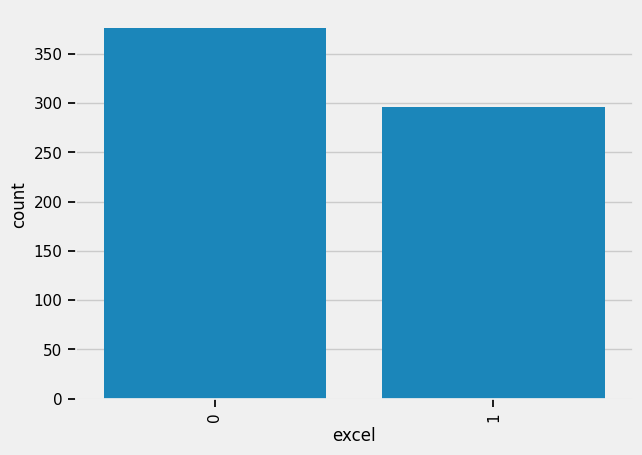

Graph for job_simp: total = 7


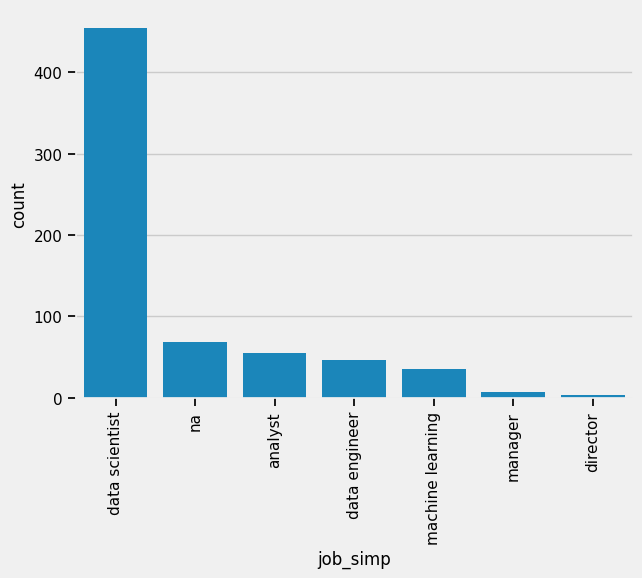

Graph for seniority: total = 3


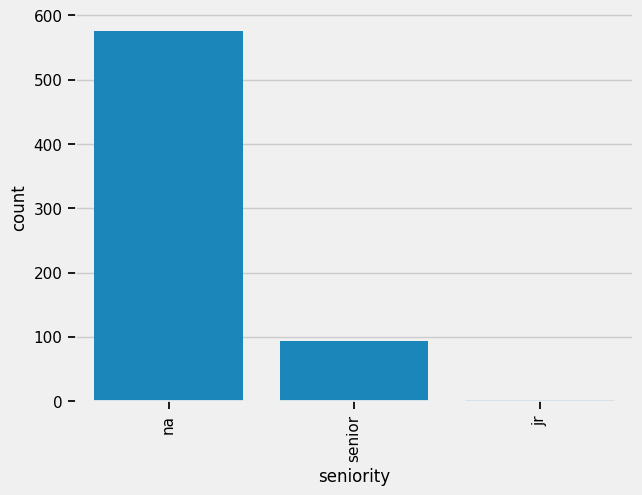

In [64]:
for i in df_cat.columns:
    cat_num  = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels() ,rotation=90)
    plt.show()

Below visualization helps in identifying the most common locations, headquarters, and company names in the dataset, which can reveal geographic or company-specific trends in the data.

Graph for Location: Total Unique Categories = 20


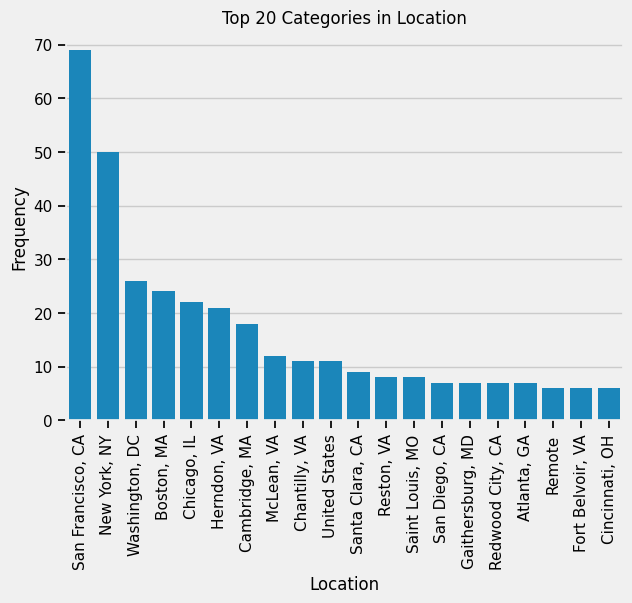

Graph for Headquarters: Total Unique Categories = 20


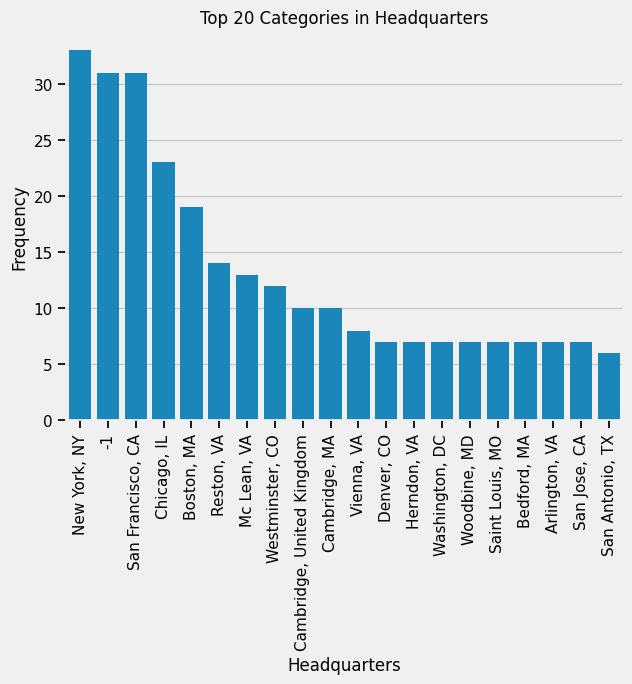

Graph for company_txt: Total Unique Categories = 20


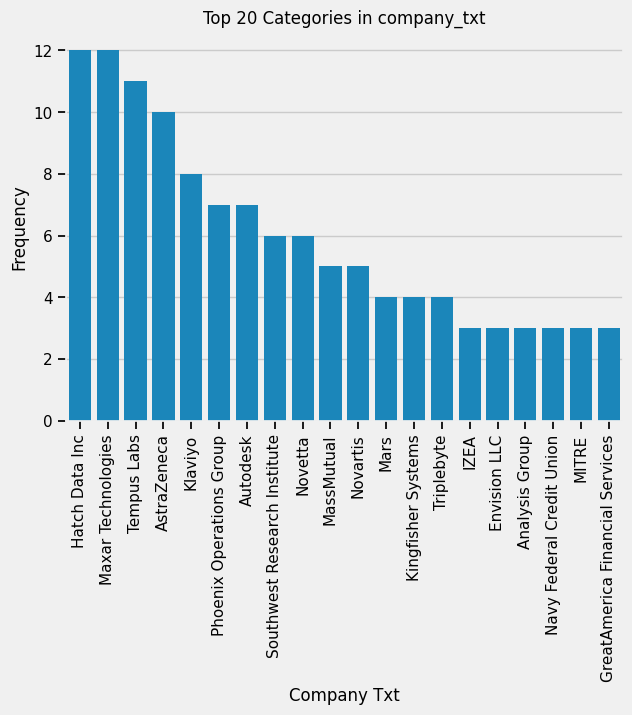

In [65]:
# Plotting distributions for top 20 categories in selected features

for column in df_cat[['Location', 'Headquarters', 'company_txt']].columns:
    top_categories = df_cat[column].value_counts()[:20]  # top 20 values
    print("Graph for %s: Total Unique Categories = %d" % (column, len(top_categories)))

    # Creating a bar plot for the top categories
    chart = sns.barplot(x=top_categories.index, y=top_categories)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.title(f"Top 20 Categories in {column}")  # Descriptive title for each plot
    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel("Frequency")
    plt.show()


In [66]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws', 'excel', 'job_simp', 'seniority', 'desc_length',
       'num_comp'],
      dtype='object')

Now I will be using the concepts of pivot table below. These pivot tables provide a comprehensive view of salary and job distribution based on multiple factors like job type, location, seniority, industry, and skills. They allow for a detailed, multidimensional analysis of trends in the data science job market.

Why Pivot Tables Are Suitable:

Simplicity: Pivot tables are designed to aggregate data and are easy to create with functions like pd.pivot_table(). They simplify data summaries without complex programming, making them ideal for exploratory data analysis.

Flexibility: With pivot tables, you can easily adjust the aggregation functions, add multiple index levels, or apply filters, making them adaptable for various types of analyses. For example, you can switch from averaging salaries to counting job listings with minimal changes.

Ease of Interpretation: Pivot tables produce clear, tabular outputs that are easy to interpret. They’re structured like summaries you’d find in business reports or dashboards, helping you communicate findings more effectively.
<hr>

Reference: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [67]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

avg_salary
job_simp                    
analyst           115.718182
data engineer     113.808511
data scientist    125.216484
director          127.333333
machine learning  117.236111
manager           138.214286
na                128.188406

In [68]:
# The below pivot table gives us the information about the average salary as per the job level(sr, jr)
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp         seniority            
analyst          jr          76.500000
                 na         116.297297
                 senior     116.764706
data engineer    jr         103.000000
                 na         114.475000
                 senior     111.166667
data scientist   na         125.701733
                 senior     121.372549
director         na         120.500000
                 senior     130.750000
machine learning na         114.000000
                 senior     126.944444
manager          na         141.166667
                 senior     120.500000
na               na         125.713115
                 senior     147.062500

In [69]:
# sIMILARly the below one is useful for giving the information about the job state(location) and the jotitle + its' count
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state    job_simp                    
WV           data scientist             1
WI           na                         1
             data scientist             4
             analyst                    1
WA           machine learning           2
             data scientist            13
             analyst                    1
VA           data scientist            66
             data engineer              5
             analyst                    8
             machine learning           5
             na                         5
UT           data scientist             1
             data engineer              2
TX           na                         2
             data scientist            12
             analyst                    3
TN           machine learning           1
             data scientist             5
             analyst                    2
SC           na                         1
             analyst                    1
RI           director                   2
PA           machine learning           2
             analyst                    4
             data scientist             5
             na                         1
OR           machine learning           1
             data scientist             1
OK           na                         4
             analyst                    2
OH           na                         2
             machine learning           1
             data scientist             9
             data engineer              2
NY           data engineer              4
             data scientist            41
             analyst                    1
             machine learning           3
             na                         3
NJ           na                         1
             data scientist             8
             analyst                    1
NH           machine learning           1
             data scientist             1
NE           data scientist             2
             analyst                    1
NC           machine learning           2
             data scientist             1
             analyst                    1
             manager                    1
             na                         3
             data engineer              1
MS           na                         1
MO           data engineer              2
             analyst                    1
             data scientist             9
MN           data scientist             1
             analyst                    3
MI           manager                    1
             data scientist             4
MD           na                         8
             data scientist            26
             data engineer              3
             analyst                    2
MA           manager                    1
             director                   1
             analyst                    1
             data scientist            37
             na                        19
             machine learning           3
LA           analyst                    1
KS           data scientist             1
IN           na                         1
             data scientist             1
             data engineer              1
             analyst                    2
IL           analyst                    3
             data scientist            19
             data engineer              2
             machine learning           3
             na                         3
IA           analyst                    3
GA           data scientist             9
FL           na                         2
             data scientist             2
             data engineer              4
DE           data scientist             1
DC           data scientist            25
             analyst                    1
CT           data scientist             2
             data engineer              2
CO           data scientist             9
             machine learning           1

In [70]:
# The below one gives us the information about the states and the average salary that state has for the jobs(data science related)
pd.pivot_table(df[df.job_simp == 'data scientist'], index = ['job_state'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

avg_salary
job_state               
DE            271.500000
NH            161.000000
AZ            147.000000
WI            144.000000
NY            141.707317
DC            139.760000
TX            138.375000
PA            136.800000
NC            136.000000
WA            128.153846
VA            127.143939
FL            125.500000
NJ            124.500000
CA            124.354701
MI            123.875000
IL            122.789474
MD            118.461538
MA            116.432432
UT            115.500000
WV            114.000000
MO            113.111111
OH            111.388889
NE            110.000000
GA            109.666667
AL            107.000000
IN            107.000000
MN            106.000000
KS            103.000000
CO            102.333333
TN            102.000000
OR             99.500000
CT             94.750000
Anne Arundel   89.000000

In [71]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, type of ownership

In [72]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided',
               'python_yn', 'R_yn', 'spark_yn', 'aws', 'excel', 'Type of ownership', 'avg_salary']]

In [73]:
# gIVES the information about the importance of python in the companies 1 means the job listing having python on the requirment and 0 means vice versa
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn                            0      1
Revenue                                      
$1 to $2 billion (USD)            10.0   26.0
$1 to $5 million (USD)             2.0   29.0
$10 to $25 million (USD)          11.0   30.0
$10+ billion (USD)                18.0   45.0
$100 to $500 million (USD)        31.0   63.0
$2 to $5 billion (USD)            14.0   31.0
$25 to $50 million (USD)           8.0   28.0
$5 to $10 billion (USD)            4.0    4.0
$5 to $10 million (USD)            3.0   11.0
$50 to $100 million (USD)          5.0   26.0
$500 million to $1 billion (USD)   7.0   12.0
-1                                 6.0   21.0
Less than $1 million (USD)         NaN   14.0
Unknown / Non-Applicable          62.0  151.0

## **MODEL** **BUILDING** **AND EVALUATION**

In [74]:
# Approach
# choose relevant columns
# get dummy data for categorical data
# train test split
# Test different models
# Tunning the parameters for few models
# Compare the results
# Some visuals for better understanding


## Basic understanding of the features and data before using

In [75]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws', 'excel', 'job_simp', 'seniority', 'desc_length',
       'num_comp'],
      dtype='object')

In [76]:
# For the model I am selecting the relevant features
df_model = df[['avg_salary' ,'Rating', 'Size', 'Type of ownership', 'Industry',
               'Sector','Revenue', 'hourly', 'employer_provided', 'job_state', 'same_state', 'age', 'python_yn', 'aws', 'excel', 'job_simp', 'seniority', 'desc_length','num_comp' ]]

In [77]:
# get dummy data for categorical data to convert it in 0 and 1

In [78]:
df_dum = pd.get_dummies(df_model)
#Categorical variables are transformed into dummy (binary) variables for compatibility with the regression model.

In [79]:
for i in df_dum.columns:
    print(i)

avg_salary
Rating
hourly
employer_provided
same_state
age
python_yn
aws
excel
desc_length
num_comp
Size_-1
Size_1 to 50 employees
Size_10000+ employees
Size_1001 to 5000 employees
Size_201 to 500 employees
Size_5001 to 10000 employees
Size_501 to 1000 employees
Size_51 to 200 employees
Size_Unknown
Type of ownership_-1
Type of ownership_College / University
Type of ownership_Company - Private
Type of ownership_Company - Public
Type of ownership_Contract
Type of ownership_Government
Type of ownership_Hospital
Type of ownership_Nonprofit Organization
Type of ownership_Other Organization
Type of ownership_Private Practice / Firm
Type of ownership_Self-employed
Type of ownership_Subsidiary or Business Segment
Type of ownership_Unknown
Industry_-1
Industry_Accounting
Industry_Advertising & Marketing
Industry_Aerospace & Defense
Industry_Architectural & Engineering Services
Industry_Banks & Credit Unions
Industry_Biotech & Pharmaceuticals
Industry_Cable, Internet & Telephone Providers
Indust

In [80]:
df_dum.head()

avg_salary  Rating  hourly  employer_provided  same_state  age  python_yn  \
0       154.0     3.1       0                  0           1   31          0   
1       154.0     4.2       0                  0           0   56          0   
2       154.0     3.8       0                  0           1   43          1   
3       154.0     3.5       0                  0           0   24          1   
4       154.0     2.9       0                  0           1   26          1   

   aws  excel  desc_length  ...  job_simp_analyst  job_simp_data engineer  \
0    1      0         3389  ...             False                   False   
1    0      0         4076  ...             False                   False   
2    1      1         8749  ...             False                   False   
3    1      1         3349  ...             False                   False   
4    0      1         2728  ...             False                   False   

   job_simp_data scientist  job_simp_director  job_simp_machine learning  \
0                     True              False                      False   
1                     True              False                      False   
2                     True              False                      False   
3                     True              False                      False   
4                     True              False                      False   

   job_simp_manager  job_simp_na  seniority_jr  seniority_na  seniority_senior  
0             False        False         False         False              True  
1             False        False         False          True             False  
2             False        False         False          True             False  
3             False        False         False          True             False  
4             False        False         False          True             False  

[5 rows x 177 columns]

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# The X has features which will help in predicting the target variable
X = df_dum.drop('avg_salary', axis = 1)
# Y that is the target varibale is the average salary
y = df_dum.avg_salary.values

In [83]:
# Splitting the data as per the choice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
print(X_train.shape)
X_test.shape

(537, 176)


(135, 176)

Below I am using this statsmodel library which have inbuilt function for modelling and Hypothesis testing. I decided to just give it a try to it. I have not included any thing about it in evaluation or anything.

In [85]:
# multi linear regression the statsmodel Library for statistical modelling
import statsmodels.api as sm

In [86]:
#A constant term is added to account for the intercept in the regression model. Then, an OLS model is fitted using the training data.
X_sm = X = sm.add_constant(X)

In [87]:
X_train = X_train.astype(int)
# Here I am ensuring that the data I will be feeding to the model is numerical not anything else

In [88]:
# Verifying the data types of the features used
print(X_train.dtypes)
print(y_train.dtype)

Rating                                               int64
hourly                                               int64
employer_provided                                    int64
same_state                                           int64
age                                                  int64
python_yn                                            int64
aws                                                  int64
excel                                                int64
desc_length                                          int64
num_comp                                             int64
Size_-1                                              int64
Size_1 to 50 employees                               int64
Size_10000+ employees                                int64
Size_1001 to 5000 employees                          int64
Size_201 to 500 employees                            int64
Size_5001 to 10000 employees                         int64
Size_501 to 1000 employees                           int

In [89]:
X_train_sm = sm.add_constant(X_train)
# Adding the constant term to the training features to account for the intercept

In [90]:
# Checking null values
print(X_train_sm.isnull().sum())
print(pd.isnull(y_train).sum())


const                                                0
Rating                                               0
hourly                                               0
employer_provided                                    0
same_state                                           0
age                                                  0
python_yn                                            0
aws                                                  0
excel                                                0
desc_length                                          0
num_comp                                             0
Size_-1                                              0
Size_1 to 50 employees                               0
Size_10000+ employees                                0
Size_1001 to 5000 employees                          0
Size_201 to 500 employees                            0
Size_5001 to 10000 employees                         0
Size_501 to 1000 employees                           0
Size_51 to

In [91]:
# Fit the model and get results
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1.187
Date:                Wed, 04 Dec 2024   Prob (F-statistic):              0.105
Time:                        15:59:42   Log-Likelihood:                -2663.0
No. Observations:                 537   AIC:                             5594.
Df Residuals:                     403   BIC:                             6168.
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

The above OLS (Ordinary Least Squares) regression output gives important statistical information about the model's performance. The R-squared value reflects how much of the dependent variable's variation is explained by the model, whereas the Adjusted R-squared takes into account the number of predictors in the model. The F-statistic and its probability indicate whether the entire model is statistically significant. The AIC and BIC are model selection criteria used to compare different models. A higher value for these indicators indicates a less optimal model. The log-likelihood statistic calculates the likelihood of the data given the model. Finally, the number of observations and degrees of freedom correspond to the size of the dataset and the number of parameters being evaluated.

The results are very poor as expected but I just decided to give it a try for the above approach.
Reference:https://www.analyticsvidhya.com/blog/2023/01/a-comprehensive-guide-to-ols-regression-part-1/https://www.analyticsvidhya.com/blog/2023/01/a-comprehensive-guide-to-ols-regression-part-1/


In [92]:
# Below are the Main Models I have used in the project.

Now above we have checked things like null values, data types, dummy data etc.
So further I will directly used the defined variables.

## Linear Regressor

In [93]:
# Importing necessary library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [94]:
# the linear Model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [95]:
# neg_mean_absolute_error shows how much we are off from general prediction on average
# The output means 20k$
np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))
# The out put is pretty worse
# The model is not performing well as the mean score error is too high

-2846117.664247681

## **Lasso** **Regression**

In [96]:
#lasso regression with it's help I will try to involve only the important features

In [97]:
from sklearn.linear_model import Lasso

In [98]:
# Initializing the model
lm_1 = Lasso()

### **Lasso Model's evaluation using the Cross Validation**

In [99]:
# Below I am evaluating the lasso model
#The mean(calculates the average mae for 3 folds(cv=3))
# The scoring metrics is kept as negative mean absolute error where lower MAE means better prediction
np.mean(cross_val_score(lm_1, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-29.090908354956667

In [100]:
alpha = []# Initializing the variable i.e alpha regularization parameter
error = []# error will be stored in this for each value of alpha

# Below will iterate for the range of alpha and will use that value of alpha and the error generated
for i in range(1, 100):
    alpha.append(i/100)
    lml = Lasso(alpha = i/100)
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)))

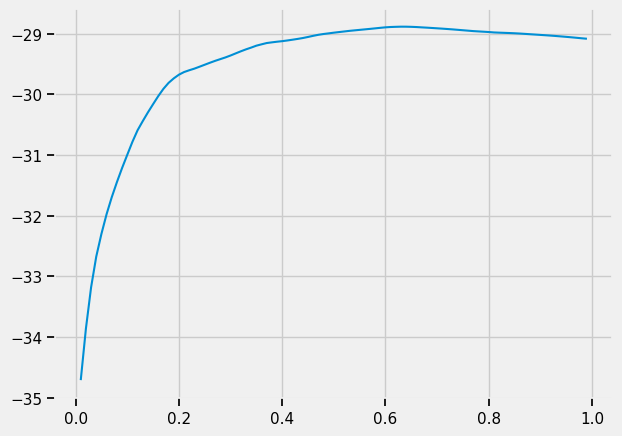

In [101]:
plt.plot(alpha, error)
#This graph helps in selecting an optimal alpha for the Lasso model by showing that an alpha around 0.6–0.8 provides the best performance.
# It demonstrates the trade-off between overfitting and underfitting as regularization strength changes.

In [102]:
err = tuple(zip(alpha, error))# In a tuple will combine the value of alpha and erro

In [103]:
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])

In [104]:
# this gives the alpha where error is maximum
df_err[df_err.error == max(df_err.error)]

alpha      error
62   0.63 -28.886837

In [105]:
lm_1 = Lasso(alpha = 0.12)
lm_1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lm_1.predict(X_test)


In [106]:
# Metrics for this model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# Calculate evaluation metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)  # Mean Absolute Error
r2_lasso = r2_score(y_test, y_pred_lasso)  # R-squared
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))  # Root Mean Squared Error

# Print the results
print("Lasso Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"R-Squared (R²): {r2_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")

Lasso Regression Evaluation Metrics:
Mean Absolute Error (MAE): 26.81
R-Squared (R²): -0.06
Root Mean Squared Error (RMSE): 35.23


## **Random Forest Regressor**

The below is the normal Random forest regressor Model

In [107]:
# random forest
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor with default parameters
rf = RandomForestRegressor(random_state=42)

# Fit the model on training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Printing  the results
print("Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")


Random Forest Regressor Performance:
Mean Absolute Error (MAE): 26.87
Root Mean Squared Error (RMSE): 36.06
R-squared (R²): -0.12


### Evaluating the Random Forest Regressor with Cross Validation

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Average score of this part
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-31.58578164327396

## Now I will Tune the Basic Random Forest Regressor with the GridSearchCV method

In [109]:
# Tune with Grid Search

In [110]:
from sklearn.model_selection import GridSearchCV
# I will be tuning the parameters using the GridSearchCV method
parameters = {'n_estimators':range(10, 300, 10), # Number of trees in forest
              'criterion':('mse', 'mae'), # mse or mae as criterion
              'max_features' : ('auto', 'sqrt', 'log2')} # max features considered when looking for the best model

In [111]:
gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv = 3)# Setting up the Grid Search Cv

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initializing the model
rf = RandomForestRegressor()

# Define the parameter grid with correct criterion values
parameters = {
    'n_estimators': range(10, 300, 10),
    'criterion': ('squared_error', 'absolute_error'),
    'max_features': ('auto', 'sqrt', 'log2')
}

# Set up GridSearchCV
gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)

# Fit the model
gs.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

XGBoost automatically maintains training and validation metrics (such as RMSE or MAE) during each boosting step.
Random Forest, on the other hand, does not use an iterative boosting procedure. Each tree in the forest is constructed independently, and there is no comparable iterative loss monitoring.

Thus, plotting Loss Fucntion plot is difficult for Random Forest Model.

So for it I have tried plotting some visuals keeping the parameters in Mind

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting  GridSearch results into a DataFrame
results_df = pd.DataFrame(gs.cv_results_)

# Extract key parameters and their corresponding mean test scores
results_df['mean_absolute_error'] = -results_df['mean_test_score']  # Convert negative MAE to positive for better understanding
# Printing the best parameters and their performance
print("Best Parameters:", gs.best_params_)
print("Best Mean Absolute Error (MAE):", -gs.best_score_)


Best Parameters: {'criterion': 'absolute_error', 'max_features': 'log2', 'n_estimators': 250}
Best Mean Absolute Error (MAE): 30.277340782122906


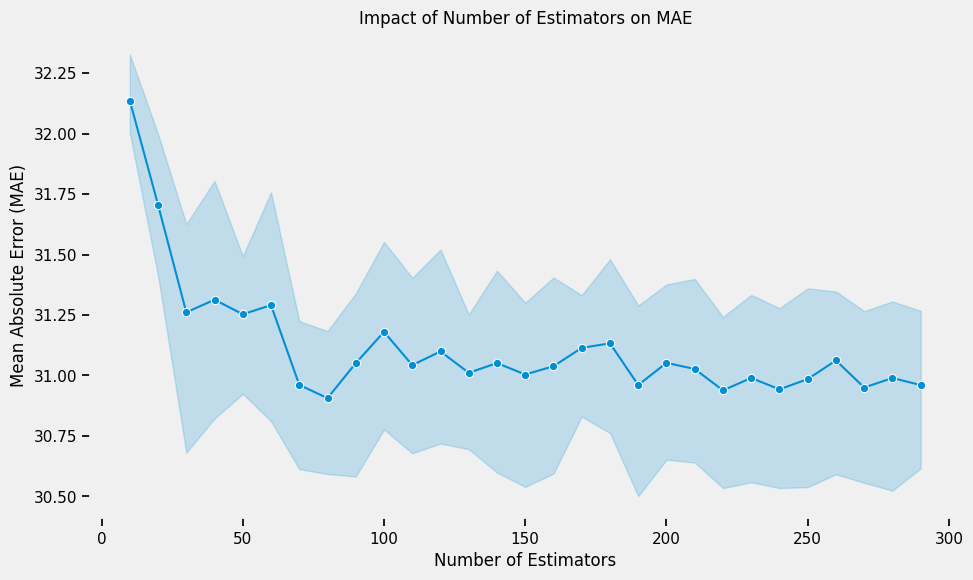

In [114]:
# Below are few visuals I have used fr random forest regressor fot the tunning parameters as plotting the loss fucntion plot is quite difficult here
# Visualization 1: Impact of Number of Estimators
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='param_n_estimators', y='mean_absolute_error', marker='o')
plt.title("Impact of Number of Estimators on MAE")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid()
plt.show()


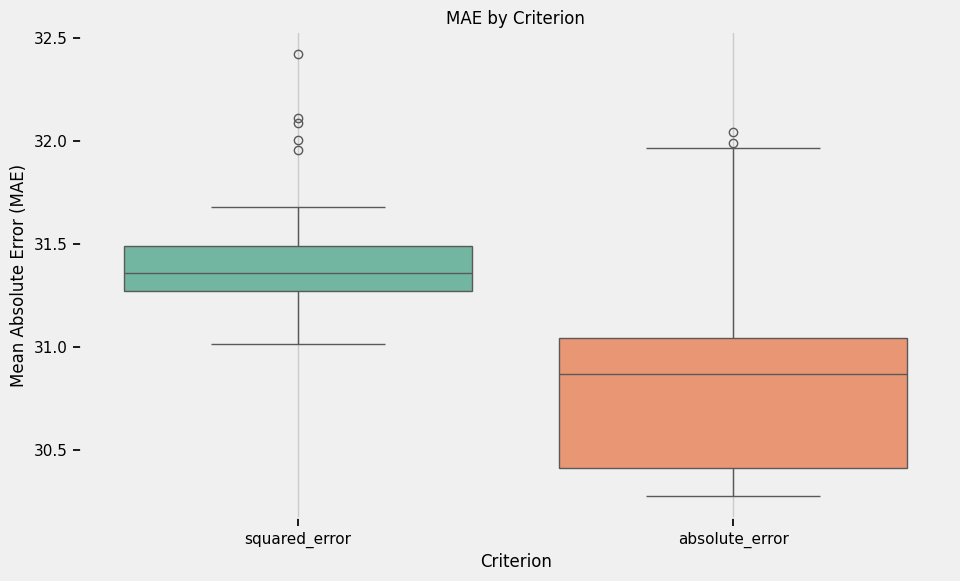

In [115]:
# Visualization 2: Comparing Criterion (squared_error vs absolute_error)
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='param_criterion', y='mean_absolute_error', palette="Set2")
plt.title("MAE by Criterion")
plt.xlabel("Criterion")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid()
plt.show()


In [116]:
gs.best_score_

-30.277340782122906

In [117]:
gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      n_estimators=250)

**The metric values of this tunned Random Forest regressor migth change each time we run the parameter tunning part code. So I have used the values in the report and the visuals for the code I ran last before submission.**

### Now below Again I am using the ML Models I have used so that I can compare there metrics scores easily

I have done this for easy understanding of what is happening

In [118]:
# test ensembles

In [119]:
lr = LinearRegression()
lr.fit(X_train, y_train)
tpred = lr.predict(X_test)# For the Linear regressor

In [120]:
tpred_lml = lm_1.predict(X_test)# For the Lasso Regressor
tpred_rf = gs.best_estimator_.predict(X_test)# For the tunned Random Forest Regressor

Below are the MAE , R-SQUARED,RMSE metric's score for the 3 models

In [121]:
from sklearn.metrics import mean_absolute_error
print("MAE for Linear Regression:", mean_absolute_error(y_test, tpred))

# Mean Absolute Error (MAE) for Lasso Regression predictions
print("MAE for Lasso Regression:", mean_absolute_error(y_test, tpred_lml))

# Mean Absolute Error (MAE) for Random Forest Regressor predictions
print("MAE for Tuned Random Forest Regressor:", mean_absolute_error(y_test, tpred_rf))

MAE for Linear Regression: 144658.9013778552
MAE for Lasso Regression: 26.806740010318556
MAE for Tuned Random Forest Regressor: 26.271311111111114


In [122]:
from sklearn.metrics import r2_score

# R-squared (R²) for Linear Regression predictions
print("R² for Linear Regression:", r2_score(y_test, tpred))

# R-squared (R²) for Lasso Regression predictions
print("R² for Lasso Regression:", r2_score(y_test, tpred_lml))

# R-squared (R²) for Random Forest Regressor predictions
print("R² for Tuned Random Forest Regressor:", r2_score(y_test, tpred_rf))


R² for Linear Regression: -593142235.0565408
R² for Lasso Regression: -0.06458338490948567
R² for Tuned Random Forest Regressor: -0.06359968648036984


In [123]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE for Linear Regression
rmse_linear = np.sqrt(mean_squared_error(y_test, tpred))
print("RMSE for Linear Regression:", rmse_linear)

# RMSE for Lasso Regression
rmse_lasso = np.sqrt(mean_squared_error(y_test, tpred_lml))
print("RMSE for Lasso Regression:", rmse_lasso)

# RMSE for Random Forest Regressor
rmse_rf = np.sqrt(mean_squared_error(y_test, tpred_rf))
print("RMSE for Tuned Random Forest Regressor:", rmse_rf)


RMSE for Linear Regression: 831654.2604279548
RMSE for Lasso Regression: 35.2332928471586
RMSE for Tuned Random Forest Regressor: 35.217010916864005


The Random Forest Regressor (optimized through GridSearchCV) demonstrates the best performance, achieving a Mean Absolute Error (MAE) of approximately 26.27, making it the most accurate model for salary prediction. Lasso Regression follows closely with an MAE of 26.81, showing strong predictive capability while addressing overfitting through regularization.

In contrast, Linear Regression shows a significantly higher MAE of 144,658.90, highlighting its unsuitability for this dataset due to the complexity and non-linear relationships present in the data.

The value of 26.27 MAE for Random Forest reflects the average absolute error in the model’s predictions. If the dataset is scaled or transformed, this value may not directly correspond to real-world salary dollars. However, if no scaling or normalization was applied, it suggests an exceptionally accurate model, with predictions deviating, on average, by only around 26 salary units. In most real-world salary datasets, this could imply an error of $26,000, which aligns with typical salary ranges in such contexts.

The GridSearchCV optimization process played a critical role in fine-tuning the Random Forest model, selecting the optimal number of estimators, max features, and criterion to minimize prediction error and enhance the model’s robustness.

In all, we can say lasso and parameter tunned Random forest regressor are performing well.

Below I am appyling technique called ensembeling the model where I am attempting to get a "best of both worlds" approach. I am taking the result and averaging them to get more accurate output.


In [124]:
(tpred_lml + tpred_rf)/2# I am taking lasso model and tunned random regressor's result

array([125.0698314 , 128.84504829, 116.53146369, 133.26472093,
       125.85170942, 125.0698314 , 130.41056574, 135.30949544,
       109.74772792, 116.51181479, 117.30763329, 123.84328665,
       119.02222279, 137.93774392, 131.45934563, 128.94523448,
       119.74152304, 100.36152276, 118.5888182 , 123.69764077,
       125.25526017, 123.66466747, 125.0698314 , 116.60619067,
       118.32433357, 117.20297892, 137.91688734, 110.93949966,
       123.33138147, 128.30856324, 125.56886111, 115.09335621,
       114.99827651, 124.348722  ,  99.45751632, 100.02986618,
       112.43244712, 124.97171366, 121.2404251 , 128.57292001,
       128.44316059, 148.57192191, 124.24759782, 132.77551478,
       140.13580748, 115.92892165, 131.43221024, 123.79299972,
       116.147964  ,  97.35491028, 108.0629143 ,  89.49714704,
       126.18441885, 120.62993756, 138.7954574 , 119.98138152,
       121.80768543, 106.7916475 , 100.36152276, 115.63946672,
       107.22939472, 138.00580914, 123.2473988 , 124.52

In [125]:
print(mean_absolute_error(y_test,(tpred_lml + tpred_rf)/2 ))

25.982635641059332


In [126]:
from sklearn.metrics import mean_absolute_error

# Predictions for each model
tpred = lm.predict(X_test)          # Linear Regression
tpred_lml = lm_1.predict(X_test)     # Lasso Regression
tpred_rf = gs.best_estimator_.predict(X_test)  # Random Forest (from GridSearchCV)

# Calculate MAE for each model
mae_linear = mean_absolute_error(y_test, tpred)
mae_lasso = mean_absolute_error(y_test, tpred_lml)
mae_rf = mean_absolute_error(y_test, tpred_rf)

# Store results in a dictionary for easier access and visualization
mae_scores = {
    'Linear Regression': mae_linear,
    'Lasso Regression': mae_lasso,
    'Tunned Random Forest': mae_rf
}



print("Model MAE Scores:", mae_scores)


Model MAE Scores: {'Linear Regression': 144658.9013778552, 'Lasso Regression': 26.806740010318556, 'Tunned Random Forest': 26.271311111111114}


Now what I have done is I have used the XGB Regrssor to check if it performs better than the models we checked.

The Reason why I have used XGBoost Regressor model is because this model is more powerful and is quite suitabke for solving more complex problems.

So I wanted to check that can this model give me better performance than then one which I already have or not//

### XGBoost Regressor The tunned one

In [145]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np
# Here Directly I will tine the model with it's parameter rather than simply checking the performance of the simple model
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': np.arange(50, 500, 50),       # Number of boosting rounds
    'max_depth': np.arange(3, 10),                # Depth of each tree
    'learning_rate': np.linspace(0.01, 0.3, 10),  # Learning rate (shrinkage)
    'subsample': np.linspace(0.6, 1.0, 5),        # Subsample ratio of the training instances
    'colsample_bytree': np.linspace(0.6, 1.0, 5), # Subsample ratio of columns when constructing each tree
    'reg_alpha': np.linspace(0, 0.5, 5),          # L1 regularization (alpha)
    'reg_lambda': np.linspace(0.5, 1.5, 5)        # L2 regularization (lambda)
}

# Instantiate the XGBoost regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up RandomizedSearchCV with flod values cross-validation( can change the value of v if needed)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_iter=50,        # Number of parameter settings that are sampled
    random_state=42,
    n_jobs=-1         # Use all available cores
)

# Fit
random_search.fit(X_train, y_train)

# extratcting the best parameters for my model
best_xgb_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("Best XGBoost Model MAE:", mae_xgb)
print("Best Parameters:", random_search.best_params_)


Best XGBoost Model MAE: 25.968146825719764
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.6}


In [146]:
print(r2_score(y_test, y_pred_xgb))

-0.0015992025715472202


Traning vs Validation Loss Analysis(RMSE) for XGB Model

As mentioned above "XGBoost automatically maintains training and validation metrics (such as RMSE or MAE) during each boosting step." Thus, I have plotted the graphs for this model which assists us to  visualize the progression of the training and validation over boosting iterations for better understanding.

[0]	validation_0-rmse:40.61628	validation_1-rmse:34.89962
[1]	validation_0-rmse:40.58075	validation_1-rmse:34.89507
[2]	validation_0-rmse:40.54149	validation_1-rmse:34.88524
[3]	validation_0-rmse:40.50087	validation_1-rmse:34.87870
[4]	validation_0-rmse:40.43342	validation_1-rmse:34.86010
[5]	validation_0-rmse:40.38357	validation_1-rmse:34.85027
[6]	validation_0-rmse:40.31430	validation_1-rmse:34.85333
[7]	validation_0-rmse:40.27640	validation_1-rmse:34.83869
[8]	validation_0-rmse:40.23321	validation_1-rmse:34.83320
[9]	validation_0-rmse:40.19163	validation_1-rmse:34.81316
[10]	validation_0-rmse:40.15190	validation_1-rmse:34.81238
[11]	validation_0-rmse:40.11494	validation_1-rmse:34.79899
[12]	validation_0-rmse:40.02706	validation_1-rmse:34.76750
[13]	validation_0-rmse:39.97177	validation_1-rmse:34.75000
[14]	validation_0-rmse:39.93883	validation_1-rmse:34.73513
[15]	validation_0-rmse:39.88015	validation_1-rmse:34.73137
[16]	validation_0-rmse:39.82866	validation_1-rmse:34.72488
[17]	va

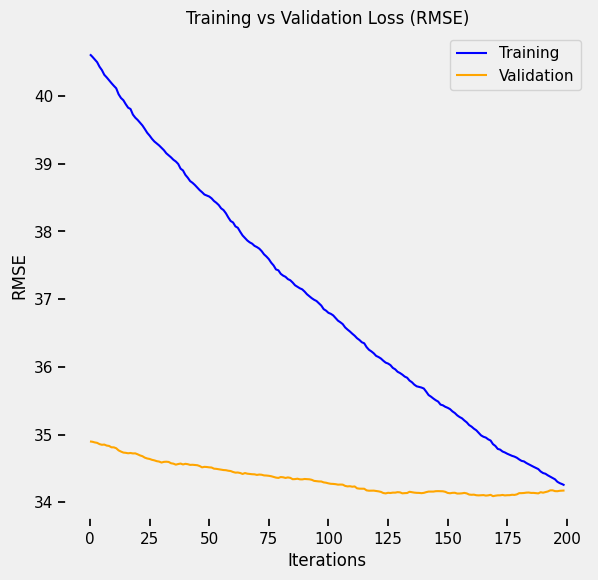

In [147]:
import matplotlib.pyplot as plt

# Create evaluation set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the best XGBoost model with evaluation logging
best_xgb_model.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=True  # Logs the progress during training
)

# Extracting the  training and validation results
results = best_xgb_model.evals_result()

print("Available metrics:", results['validation_0'].keys())

# Adjusting the plot as per the requirment
if 'mae' in results['validation_0']:
    metric = 'mae'
elif 'rmse' in results['validation_0']:
    metric = 'rmse'
else:
    raise KeyError("Expected 'mae' or 'rmse' metric not found in evals_result!")

# Plot training vs validation loss
plt.figure(figsize=(6, 6))
plt.plot(results['validation_0'][metric], label='Training', color='blue')
plt.plot(results['validation_1'][metric], label='Validation', color='orange')
plt.title(f"Training vs Validation Loss ({metric.upper()})")
plt.xlabel("Iterations")
plt.ylabel(f"{metric.upper()}")
plt.legend()
plt.grid()
plt.show()

Training vs Validation Loss(MAE) XGB Model

[0]	validation_0-mae:29.10892	validation_1-mae:27.04748
[1]	validation_0-mae:29.07006	validation_1-mae:27.03885
[2]	validation_0-mae:29.04857	validation_1-mae:27.01523
[3]	validation_0-mae:29.02529	validation_1-mae:26.99979
[4]	validation_0-mae:28.97728	validation_1-mae:27.00078
[5]	validation_0-mae:28.94787	validation_1-mae:26.99875
[6]	validation_0-mae:28.89522	validation_1-mae:26.97036
[7]	validation_0-mae:28.85876	validation_1-mae:26.96116
[8]	validation_0-mae:28.83241	validation_1-mae:26.94473
[9]	validation_0-mae:28.78839	validation_1-mae:26.90572
[10]	validation_0-mae:28.74696	validation_1-mae:26.90442
[11]	validation_0-mae:28.72049	validation_1-mae:26.89613
[12]	validation_0-mae:28.67277	validation_1-mae:26.85910
[13]	validation_0-mae:28.64287	validation_1-mae:26.84071
[14]	validation_0-mae:28.60733	validation_1-mae:26.82436
[15]	validation_0-mae:28.57829	validation_1-mae:26.80828
[16]	validation_0-mae:28.54295	validation_1-mae:26.79906
[17]	validation_0-mae:28.51850	validation

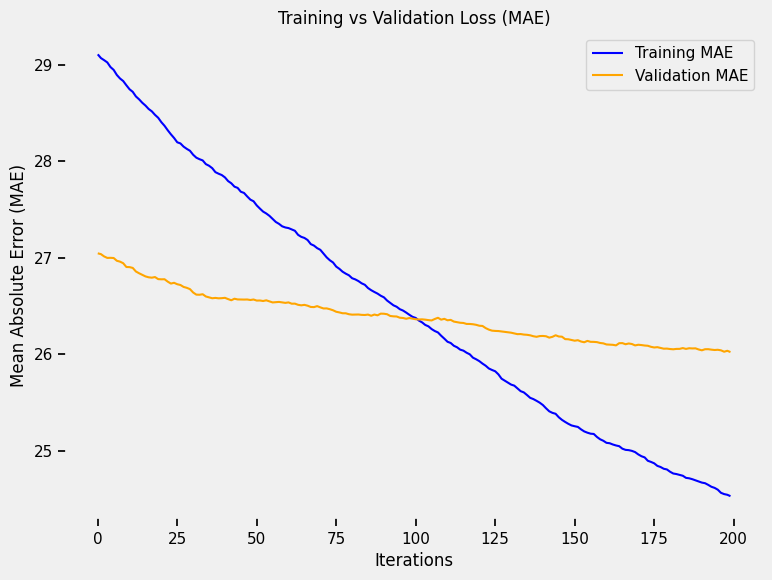

In [148]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Create evaluation set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Re-initialize XGBRegressor with best parameters and eval_metric
best_xgb_model = XGBRegressor(**random_search.best_params_, eval_metric="mae")

# Train the model with evaluation logging
best_xgb_model.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=True  # Logs the progress during training
)

# Extract training and validation results
results = best_xgb_model.evals_result()

# Plot training vs validation loss (MAE)
plt.figure(figsize=(8, 6))
plt.plot(results['validation_0']['mae'], label='Training MAE', color='blue')
plt.plot(results['validation_1']['mae'], label='Validation MAE', color='orange')
plt.title("Training vs Validation Loss (MAE)")
plt.xlabel("Iterations")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()
plt.grid()
plt.show()

I even tried a stacked model where I tried combining different regressor models but the result I got was not optimal

In [149]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Define base models I will be using in the stacked model
base_models = [
    ('xgb', XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=4)),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('lasso', Lasso(alpha=0.1))
]

# Define meta-model
meta_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3)

# Create stacking ensemble that is combining the models
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train and evaluate the stacking model
stacked_model.fit(X_train, y_train)
y_pred_stacked = stacked_model.predict(X_test)

# Calculating the  MAE
from sklearn.metrics import mean_absolute_error
mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
print("Stacked Model MAE:", mae_stacked)


Stacked Model MAE: 28.570509729634075


## Lets Take an Overview of the evaluation metrics for all the Models

In [150]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# tpred = predictions for Linear Regression
# tpred_lml = predictions for Lasso Regression
# tpred_rf = predictions for Random Forest
# tpred_rf_tuned = predictions for Tuned Random Forest
# tpred_xgb = predictions for XGBoost

# Calculating the evaluation metrics like we did above in previous cells

# Linear Regression
mae_lr = mean_absolute_error(y_test, tpred)
r2_lr = r2_score(y_test, tpred)
rmse_lr = np.sqrt(mean_squared_error(y_test, tpred))

# Lasso Regression
mae_lasso = mean_absolute_error(y_test, tpred_lml)
r2_lasso = r2_score(y_test, tpred_lml)
rmse_lasso = np.sqrt(mean_squared_error(y_test, tpred_lml))

# Random Forest Regressor (Basic)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Tuned Random Forest Regressor
mae_rf_tuned = mean_absolute_error(y_test, tpred_rf)
r2_rf_tuned = r2_score(y_test, tpred_rf)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, tpred_rf))

# XGBoost Regressor (Tuned)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Creating a dictionary o store the values
results = {
    "Model": ["Linear Regression", "Lasso Regression", "Random Forest", "Tuned Random Forest", "Tuned XGBoost"],
    "MAE": [mae_lr, mae_lasso, mae_rf, mae_rf_tuned, mae_xgb],
    "R-Squared": [r2_lr, r2_lasso, r2_rf, r2_rf_tuned, r2_xgb],
    "RMSE": [rmse_lr, rmse_lasso, rmse_rf, rmse_rf_tuned, rmse_xgb]
}

# Dataframe for a better table like output
results_df = pd.DataFrame(results)

print(results_df)




                 Model            MAE     R-Squared           RMSE
0    Linear Regression  144658.901378 -5.931422e+08  831654.260428
1     Lasso Regression      26.806740 -6.458338e-02      35.233293
2        Random Forest      26.865959 -1.153593e-01      36.063742
3  Tuned Random Forest      26.271311 -6.359969e-02      35.217011
4        Tuned XGBoost      25.968147 -1.599203e-03      34.175146


## Lets Plot some visuals for the results I got

## Comparision of MAE AND RMSE score for different Models

I have not used Linear Regression for any plots below beacuse the results provided by Linear Regression were very poor so visuals of this model might not generate any benefits.

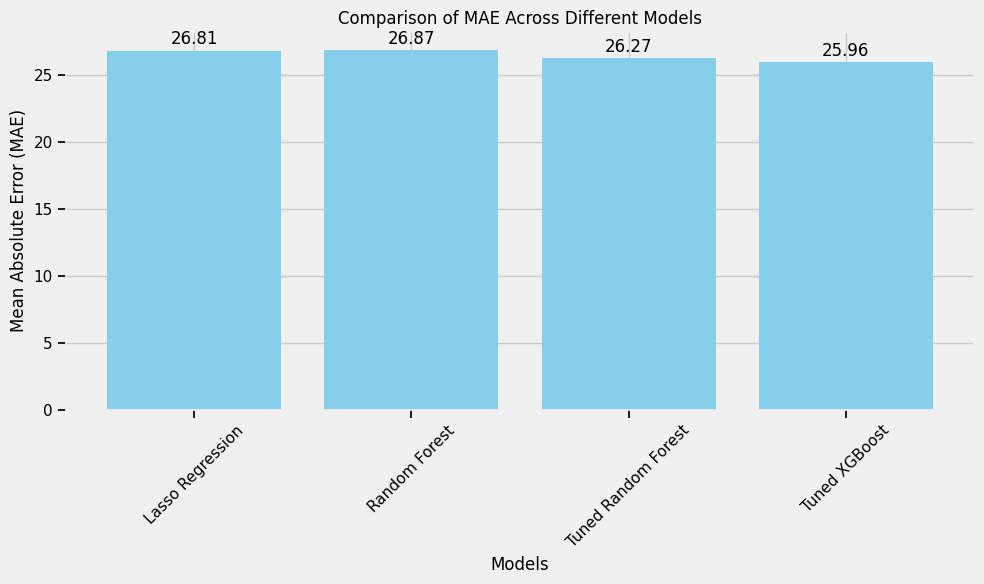

In [151]:
import matplotlib.pyplot as plt

# Model names and corresponding MAE values
models = [ 'Lasso Regression', 'Random Forest', 'Tuned Random Forest', 'Tuned XGBoost']
# I have directly used the values from above results( I have not again called the model and have done the detailed stuff.)
mae_values = [ 26.81, 26.87, 26.27, 25.96]
rmse_values = [35.23, 36.06, 35.21, 34.18]

# MAE Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color='skyblue')
plt.title('Comparison of MAE Across Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)

# Adding labels on top of the bars for better understanding
for i, value in enumerate(mae_values):
    plt.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

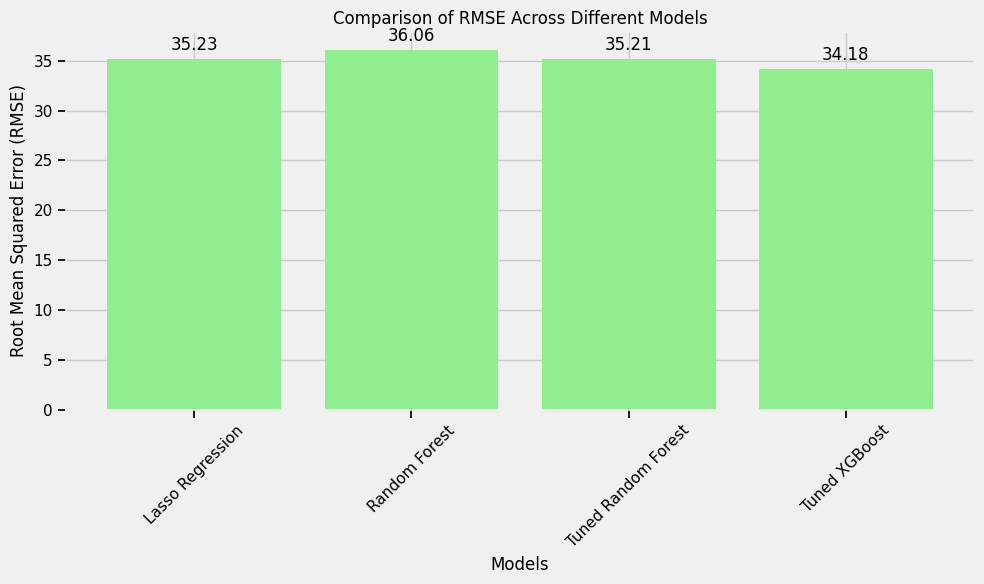

In [152]:
# RMSE Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='lightgreen')
plt.title('Comparison of RMSE Across Different Models')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45)

for i, value in enumerate(rmse_values):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

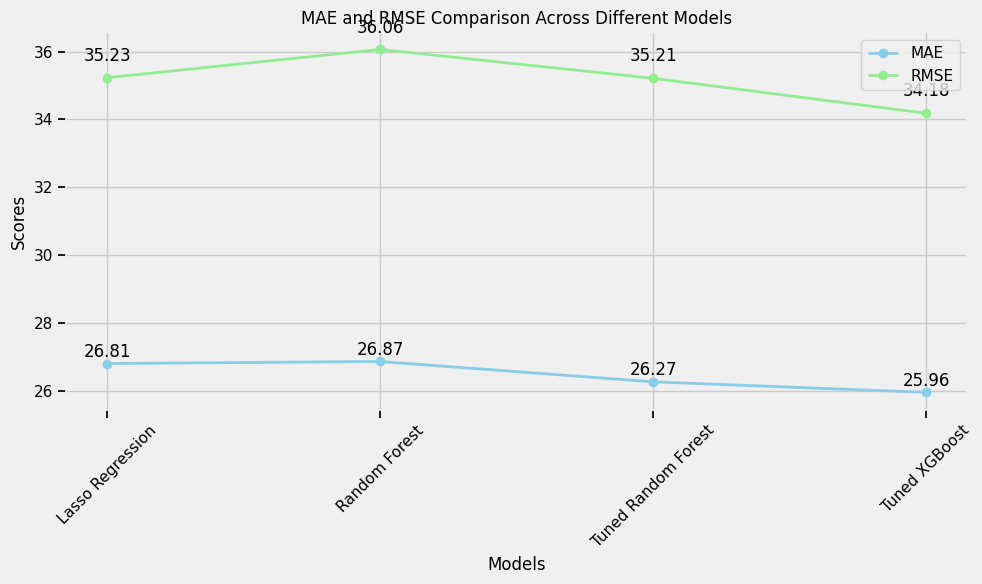

In [153]:
# MAE and RMSE Comparison Line Plot
plt.figure(figsize=(10, 6))

# Plotting both MAE and RMSE trends on the same plot basically a line plot
plt.plot(models, mae_values, marker='o', label='MAE', color='skyblue', linestyle='-', linewidth=2)
plt.plot(models, rmse_values, marker='o', label='RMSE', color='lightgreen', linestyle='-', linewidth=2)

#  titles and labels
plt.title('MAE and RMSE Comparison Across Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Adding value labels for both MAE and RMSE for better understanding
for i, value in enumerate(mae_values):
    plt.text(i, value + 0.2, f'{value:.2f}', ha='center', fontsize=12)
for i, value in enumerate(rmse_values):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

## Predicted and Actual Salaries Scatter Plot

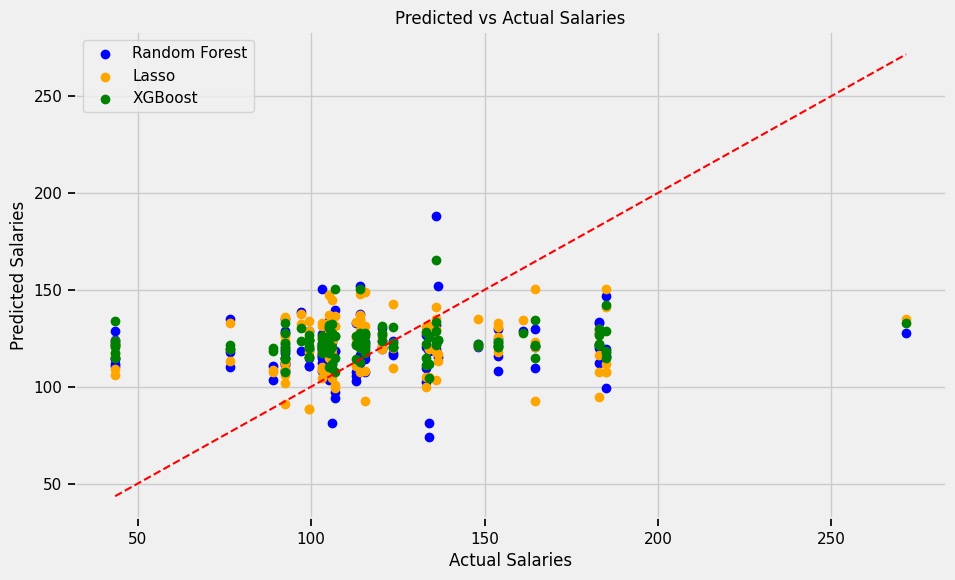

In [136]:
plt.figure(figsize=(10, 6))
# have used the above predefined variable for the predicted and true values
plt.scatter(y_test, tpred_rf, color='blue', label='Random Forest')
plt.scatter(y_test, tpred_lml, color='orange', label='Lasso')
plt.scatter(y_test, y_pred_xgb, color='green', label='XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicted vs Actual Salaries")
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.legend()
plt.show()


The above plot gives us the information about Predicted vs Actual Salaries for the 3 modelsas mentioned in the legend. Main point to consider:

--- Closer to the Red Line = Better Predictions


## Lets Plot few graph to check the difference between actual and predcited values for the salaries

# **Actual vs Predicted Salary for Random Forest Regressor**

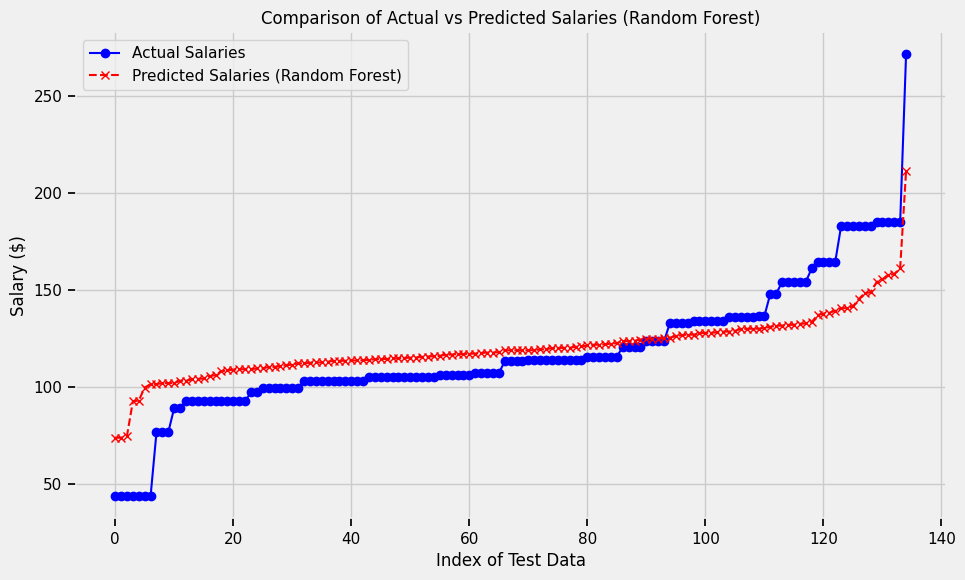

In [137]:
# Sorting the actual and predicted values of salary for better understanding and visualization
# I have applied these similar things for all the other models for the predcited and actual salaries in the below codes
sorted_actual = sorted(y_test)
sorted_predicted_rf = sorted(y_pred_rf)

# Plot the actual vs predicted salaries for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.plot(sorted_actual, label='Actual Salaries', color='blue', linestyle='-', marker='o')
plt.plot(sorted_predicted_rf, label='Predicted Salaries (Random Forest)', color='red', linestyle='--', marker='x')

plt.title('Comparison of Actual vs Predicted Salaries (Random Forest)')
plt.xlabel('Index of Test Data')
plt.ylabel('Salary ($)')
plt.legend()


plt.grid(True)
plt.show()

# **Actual vs Predicted Salary for Lasso Regressor**

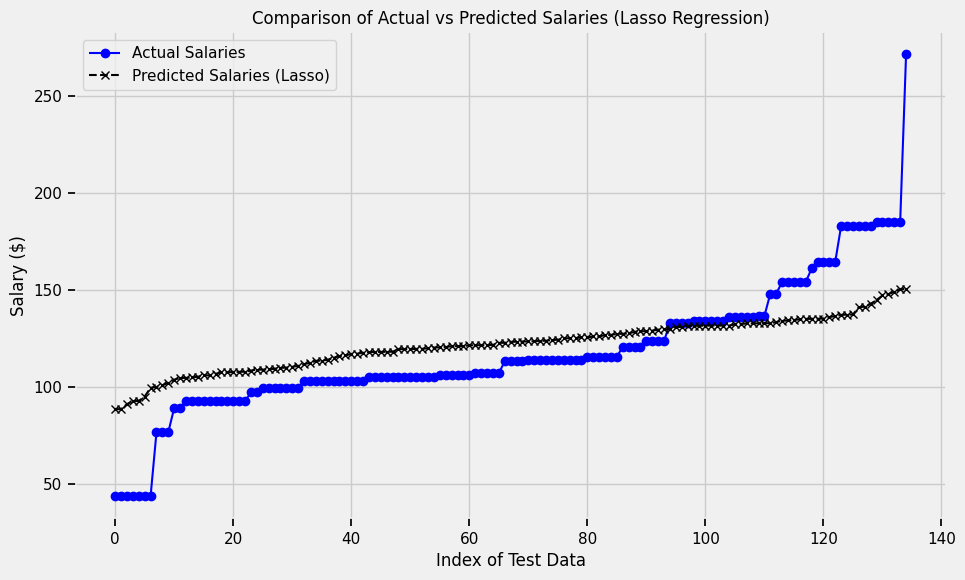

In [138]:
# For Lasso Regression
y_pred_lasso = lm_1.predict(X_test)

sorted_actual = sorted(y_test)
sorted_predicted_lasso = sorted(y_pred_lasso)


plt.figure(figsize=(10, 6))
plt.plot(sorted_actual, label='Actual Salaries', color='blue', linestyle='-', marker='o')
plt.plot(sorted_predicted_lasso, label='Predicted Salaries (Lasso)', color='black', linestyle='--', marker='x')

plt.title('Comparison of Actual vs Predicted Salaries (Lasso Regression)')
plt.xlabel('Index of Test Data')
plt.ylabel('Salary ($)')
plt.legend()

plt.grid(True)
plt.show()


# **Actual vs Predicted Salary for Tunned Random Forest Regressor**

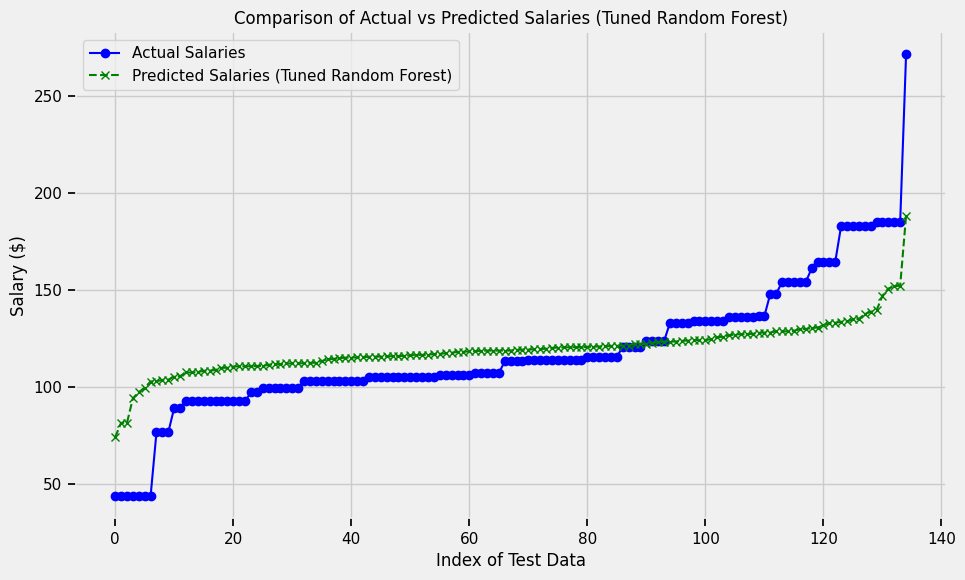

In [139]:
# Tunned Random Forest Regressor
y_pred_rf_tuned = gs.best_estimator_.predict(X_test)

sorted_actual = sorted(y_test)
sorted_predicted_rf_tuned = sorted(y_pred_rf_tuned)

plt.figure(figsize=(10, 6))
plt.plot(sorted_actual, label='Actual Salaries', color='blue', linestyle='-', marker='o')
plt.plot(sorted_predicted_rf_tuned, label='Predicted Salaries (Tuned Random Forest)', color='green', linestyle='--', marker='x')

plt.title('Comparison of Actual vs Predicted Salaries (Tuned Random Forest)')
plt.xlabel('Index of Test Data')
plt.ylabel('Salary ($)')
plt.legend()

plt.grid(True)
plt.show()


# **Actual vs Predicted Salary for Tuned XGBoost Regressor**

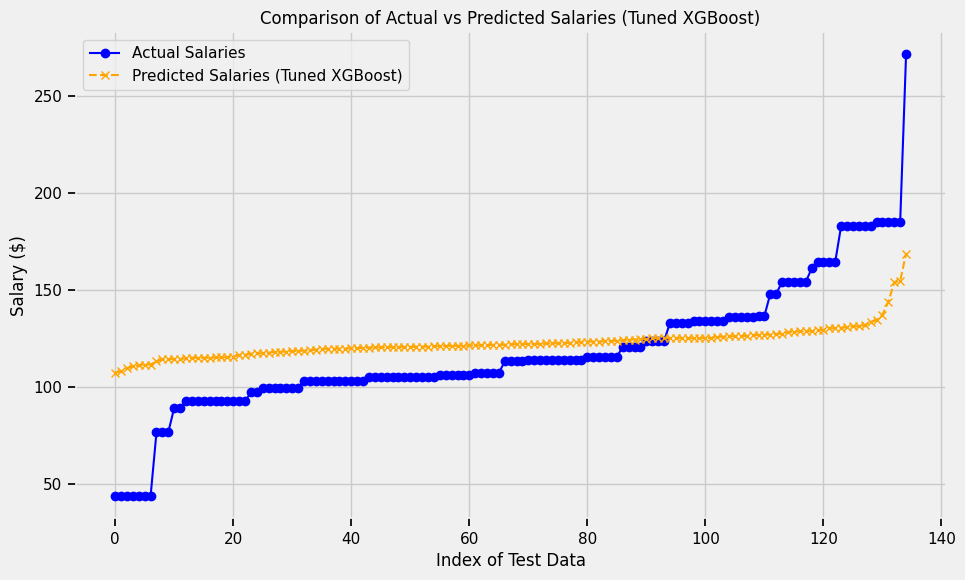

In [140]:
# Tunned XGboost Regressor
y_pred_xgb = best_xgb_model.predict(X_test)

sorted_actual = sorted(y_test)
sorted_predicted_xgb = sorted(y_pred_xgb)

plt.figure(figsize=(10, 6))
plt.plot(sorted_actual, label='Actual Salaries', color='blue', linestyle='-', marker='o')
plt.plot(sorted_predicted_xgb, label='Predicted Salaries (Tuned XGBoost)', color='orange', linestyle='--', marker='x')

plt.title('Comparison of Actual vs Predicted Salaries (Tuned XGBoost)')
plt.xlabel('Index of Test Data')
plt.ylabel('Salary ($)')
plt.legend()

plt.grid(True)
plt.show()


# Error Distribution Plots

These Below code are essentially visualizing the distribution of prediction errors (residuals), helping assess the model's performance. If the residuals are centered around zero with a symmetrical distribution, it indicates a good fit. If there are large errors or skewed distribution, it may signal issues with the model’s performance.

In below graphs X axis is residual error(The difference between true and predicted values) . Y axis is the number of those residuals faling under those range

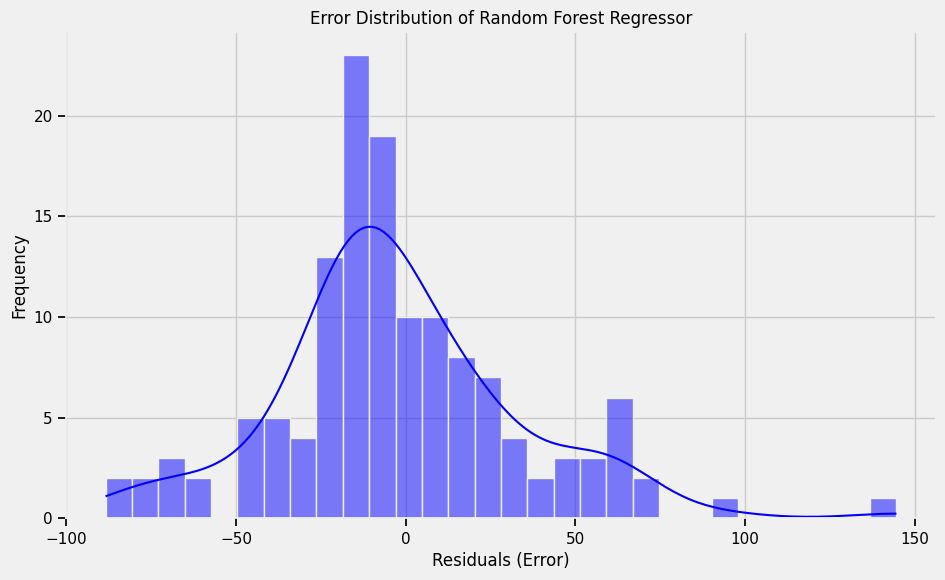

In [141]:
# Calculating the  residuals (errors) for Randon Regressor
residuals_rf = y_test - y_pred_rf

# Plotting error distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True, color='blue', bins=30)
plt.title('Error Distribution of Random Forest Regressor')
plt.xlabel('Residuals (Error)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



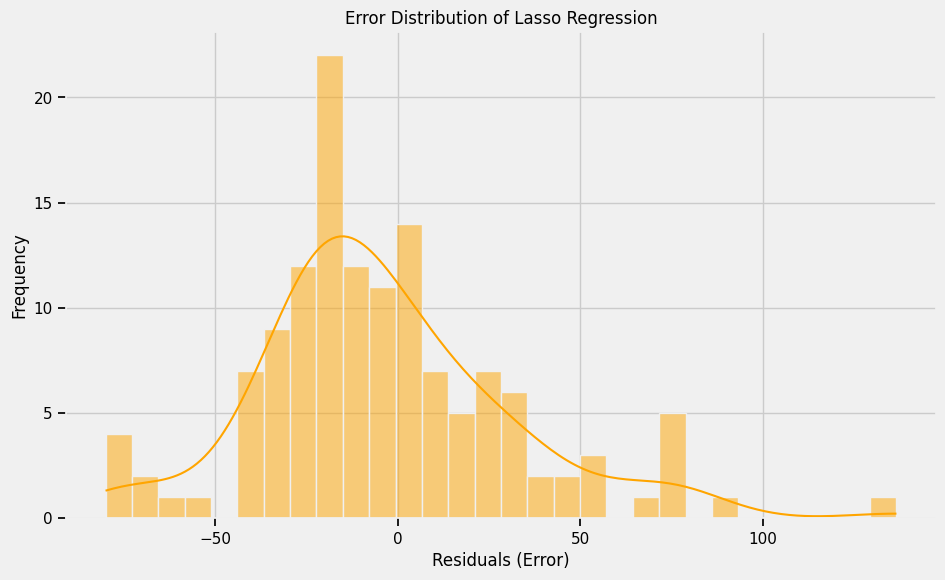

In [142]:
# Calculating the residuals (errors) for Lasso Regression
residuals_lasso = y_test - y_pred_lasso

plt.figure(figsize=(10, 6))
sns.histplot(residuals_lasso, kde=True, color='orange', bins=30)
plt.title('Error Distribution of Lasso Regression')
plt.xlabel('Residuals (Error)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


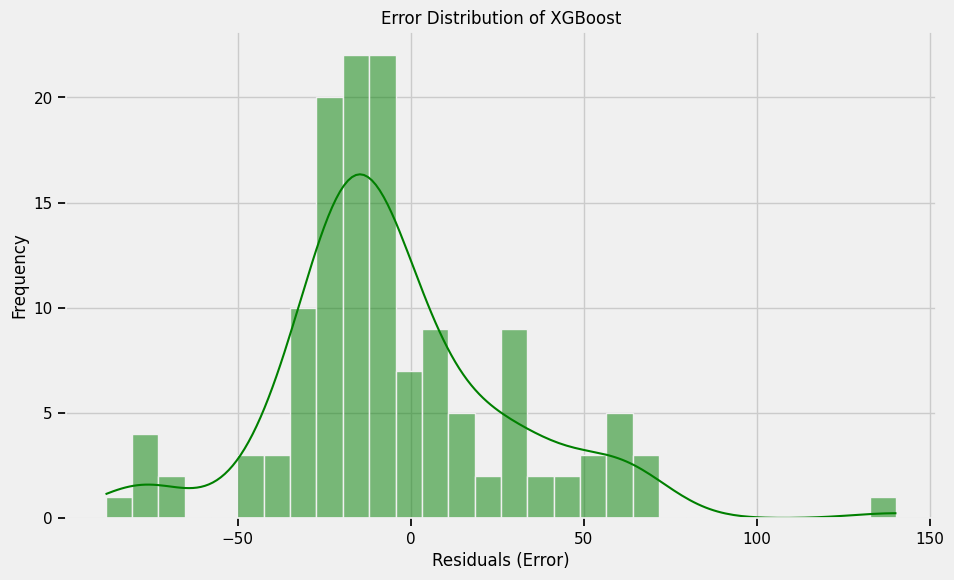

In [143]:
# Calculating the residuals (errors) for tunned XGBoost
residuals_xgb = y_test - y_pred_xgb

# Plotting the error distribution for XGBoost
plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, kde=True, color='green', bins=30)
plt.title('Error Distribution of XGBoost')
plt.xlabel('Residuals (Error)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# **CONCLUDING STATEMENTS**

To evaluate model performance, we used three metrics: Mean Absolute Error (MAE), R-Squared (R²), and Root Mean Squared Error (RMSE). Below is a comparison of how each model performed:

## 1. Linear Regression:
MAE: 144,658.90 — The MAE is very high, indicating that the model's predictions are off by about $144,659, making it inaccurate for this dataset.

R²: -5.93e+08 — Negative R² shows the model fails to capture the variance in the data and performs worse than a simple mean-based prediction.

RMSE: 831,654.26 — The high RMSE confirms large prediction errors, reinforcing that Linear Regression is not suitable for this problem.

<HR>

## 2. Lasso Regression:
MAE: 26.81 — Lasso performs much better than Linear Regression, with the average prediction error reduced to $26.81.

R²: -0.06458 — While the MAE improves, the R² remains negative, indicating that Lasso does not explain the data well.

RMSE: 35.23 — Although Lasso has a lower RMSE than Linear Regression, it still struggles with large errors compared to more complex models.

<HR>

## 3. Random Forest:
MAE: 26.87 — The MAE is slightly higher than Lasso but still much better than Linear Regression, showing improved accuracy.

R²: -0.11536 — The R² is negative but an improvement over the previous models, indicating that Random Forest is starting to better capture the data's variance.

RMSE: 36.06 — The RMSE is still high, but Random Forest performs better in predicting salary values compared to simpler models.

<HR>

## 4. Tuned Random Forest:
MAE: 26.27 — The Tuned Random Forest model performs slightly better than the basic Random Forest, thanks to hyperparameter tuning using GridSearchCV.

R²: -0.063 — The R² improves slightly, showing that tuning the model helps explain a little more of the variance.

RMSE: 35.21 — The RMSE is slightly better than the basic Random Forest, indicating that hyperparameter tuning improved the model's predictive accuracy.
<HR>

## 5. Tuned XGBoost:
MAE: 25.97 — XGBoost outperforms all other models with the lowest MAE, indicating the most accurate predictions.

R²: -0.0016 — While still negative, the R² for XGBoost is the least negative, suggesting the model better captures the variance in the data.

RMSE: 34.18 — The lowest RMSE confirms that Tuned XGBoost offers the best performance, with the smallest prediction errors.

I know the results of this project are not what I actually wanted I tried my best using different models to check which one can give me best using several method but still the solution is not too optimal. There are few reasons that I have have mentioned might have affected:<br><br>


1) Complex Dataset: The salary prediction problem involves a wide range of factors such as job titles, company size, location, and industry. These complex relationships may not be fully captured by the features, leading to imperfect predictions.
<br>
<br>


2) Missing Important Features: Some key variables, like years of experience or education level, may be missing, which could significantly affect salary predictions. This could explain the lower accuracy of the models.<br><br>



3) Data Imbalance: If certain salary ranges (e.g., very high or low salaries) are underrepresented in the dataset, the model might not generalize well across all salary levels, leading to inaccurate predictions for rare salary values.
<br><br>

4) Model Limitations: While Random Forest and XGBoost are strong models, they may not be the best fit for this type of problem. More complex models, such as deep learning algorithms, could potentially capture the intricate relationships in the data better.



## References:


Pandas Documentation:
https://pandas.pydata.org/docs/

Scikit-Learn Documentation:
https://scikit-learn.org/stable/documentation.html

XGBoost Documentation:
https://xgboost.readthedocs.io/en/stable/

Matplotlib Documentation:
https://matplotlib.org/stable/contents.html

Seaborn Documentation:
https://seaborn.pydata.org/

Kaggle - Datasets and Notebooks:
https://www.kaggle.com/

NumPy Documentation:
https://numpy.org/doc/

FuzzyWuzzy Documentation (String Matching):
https://github.com/seatgeek/fuzzywuzzy

RandomForestRegressor - Scikit-Learn:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Hyperparameter Tuning Techniques - RandomizedSearchCV:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Google Colab (for Python Notebooks):
https://colab.research.google.com/